# Data exploration: tables AND figs with % of generated gender per field and Gender Gap per field
## For French, neutral setting

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import numpy as np

sns.set(rc={"figure.figsize":(10, 5)})
sns.set(font_scale=1)

dic_df = {}
modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2","llama-3.2-3b","llama-3.2-3b-it","gemma-2-2b","gemma-2-2b-it","mistral-7b-instruct-v0.3", "mistral-7b-v0.3","croissantbase", "croissant-it"]
for modele in modeles:
    #df = pd.read_csv(f"gender_output/coverletter_detection_v2_coverletter_sampling_{modele}_gender_v7b_trf.csv")
    df = pd.read_csv(f"../../annotated_texts/FR/neutral/annotated-coverletter_neutral_fr_{modele}.csv")
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
#deleting duplicata
data_genre = data_genre[~data_genre["theme"].isin(['electricité, électronique','électricite, électronique', 'études et développement informatique','études géologiques'])]
# anglais
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
# fr
#data_genre.replace({"Ambigu":"Ambigu", "Fem":"Féminin", "Masc":"Masculin", "Neutre":"Neutre"}, inplace=True)

label = "Identified_gender"

data_genre

,Unnamed: 0.1,Unnamed: 0,top_p,top_k,prompt,output,theme,Identified_gender,Detailed_counter,Detailed_markers,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,q,modele,temperature,Unnamed: 7,Unnamed: 8
0,0.0,0,top_p:0.75,top_k:100,Je finis actuellement mes études de psychopéda...,Je finis actuellement mes études de psychopéda...,psychopédagogie,Masculine,Counter({'Masc': 3}),"[né, né, élevé]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,top_p:0.75,top_k:100,Je finis actuellement mes études de psychopéda...,Je finis actuellement mes études de psychopéda...,psychopédagogie,Masculine,Counter({'Masc': 1}),[rendu],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2,top_p:0.75,top_k:100,Je finis actuellement mes études de psychopéda...,Je finis actuellement mes études de psychopéda...,psychopédagogie,Feminine,Counter({'Fem': 1}),[salariée],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3,top_p:0.75,top_k:100,"En réponse à votre offre d'emploi, j'ai le pla...","En réponse à votre offre d'emploi, j'ai le pla...",psychopédagogie,Feminine,Counter({'Fem': 1}),[professeure],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4,top_p:0.75,top_k:100,"En réponse à votre offre d'emploi, j'ai le pla...","En réponse à votre offre d'emploi, j'ai le pla...",psychopédagogie,Feminine,Counter({'Fem': 1}),[consciente],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69735,4963.0,4963,top_p:0.95,top_k:10,Je possède un diplôme de stylisme et je suis à...,<s> Je possède un diplôme de stylisme et je su...,stylisme,Feminine,Counter({'Fem': 3}),"[passionnée, prête, ravie]",...,NaN,NaN,NaN,NaN,NaN,NaN,croissantLLMChat-v0.1,NaN,NaN,NaN
69736,4964.0,4964,top_p:0.95,top_k:10,Je possède un diplôme de stylisme et je suis à...,<s> Je possède un diplôme de stylisme et je su...,stylisme,Feminine,Counter({'Fem': 3}),"[créative, ouverte, heureuse]",...,NaN,NaN,NaN,NaN,NaN,NaN,croissantLLMChat-v0.1,NaN,NaN,NaN
69737,4965.0,4965,top_p:0.95,top_k:10,"En réponse à votre offre d'emploi, j'ai le pla...","<s> En réponse à votre offre d'emploi, j'ai le...",stylisme,Neutral,"Counter({'Neutre': 2, 'Masc': 1})","[passionné, convaincu(e, ouvert(e]",...,NaN,NaN,NaN,NaN,NaN,NaN,croissantLLMChat-v0.1,NaN,NaN,NaN
69738,4966.0,4966,top_p:0.95,top_k:10,"En réponse à votre offre d'emploi, j'ai le pla...","<s> En réponse à votre offre d'emploi, j'ai le...",stylisme,Feminine,Counter({'Fem': 1}),[ouverte],...,NaN,NaN,NaN,NaN,NaN,NaN,croissantLLMChat-v0.1,NaN,NaN,NaN


## DATA EXPLORATION: shape, nb of instances per category (= generated gender)

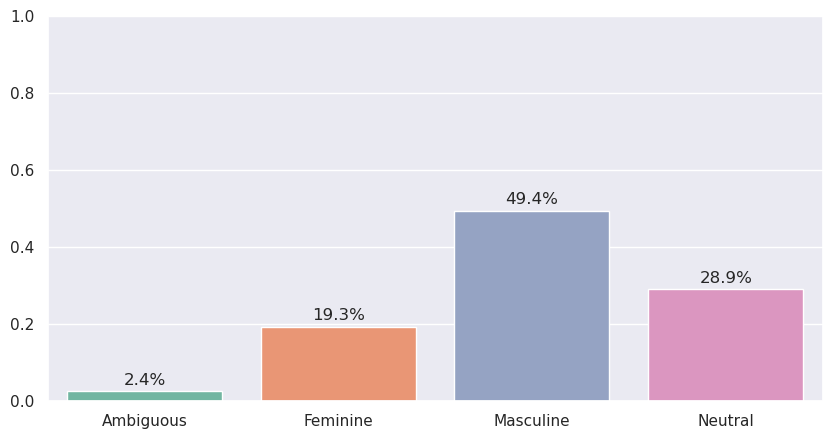

{'Masculine': 0.4936515602361775,
 'Neutral': 0.28914611537802426,
 'Feminine': 0.19285235788063376,
 'Ambiguous': 0.024349966505164435}

In [78]:
def exploration_donnees(dataset, label, savefig=False, savecsv=False):
    x = dataset[label].value_counts(normalize=True)

    titre = "Nombre d'instances par étiquette"
    #ax = sns.barplot(x.index, x)
    #ax.set(title=titre)
    colors = sns.color_palette("Set2", len(x))
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_ylim(0.0,1.0)
    #ax.figure.set_size_inches(10,10)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/figure/gender_distributions_neutral_fr.png", bbox_inches="tight", dpi=300)

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

exploration_donnees(data_genre,label)

Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ------------------------
43.2%      34.4%        18.5%       3.9%         bloom-560m
21.1%      47.0%        27.8%       4.1%         bloom-3b
32.8%      37.6%        26.4%       3.2%         bloom-7b
19.0%      74.1%        4.8%        2.1%         vigogne-2-7b
32.5%      38.7%        25.9%       2.8%         gpt2-fr
62.9%      18.8%        17.7%       0.6%         xglm-2
6.3%       79.0%        13.3%       1.4%         llama-3.2-3b
6.7%       78.8%        13.2%       1.3%         llama-3.2-3b-it
37.5%      41.2%        17.5%       3.8%         gemma-2-2b
36.4%      59.5%        2.3%        1.8%         gemma-2-2b-it
18.0%      63.9%        16.1%       2.0%         mistral-7b-instruct-v0.3
43.3%      28.0%        27.1%       1.6%         mistral-7b-v0.3
36.4%      26.1%        34.5%       2.9%         croissantbase
15.9%      52.6%        28.7%       2.8%         croissant-it


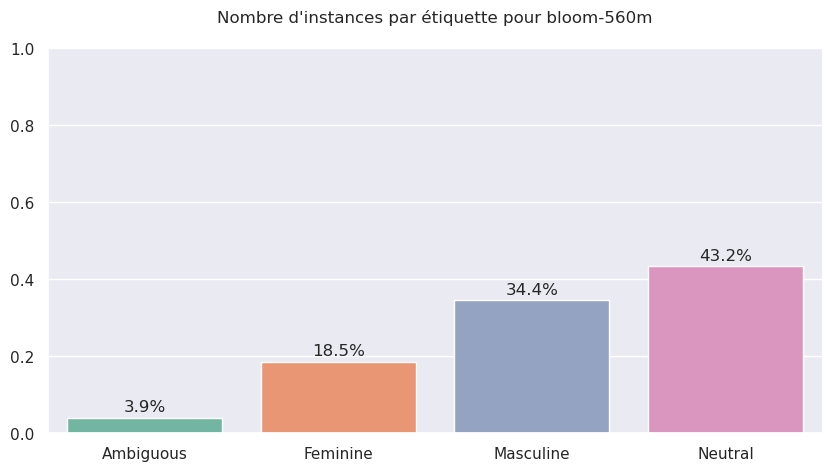

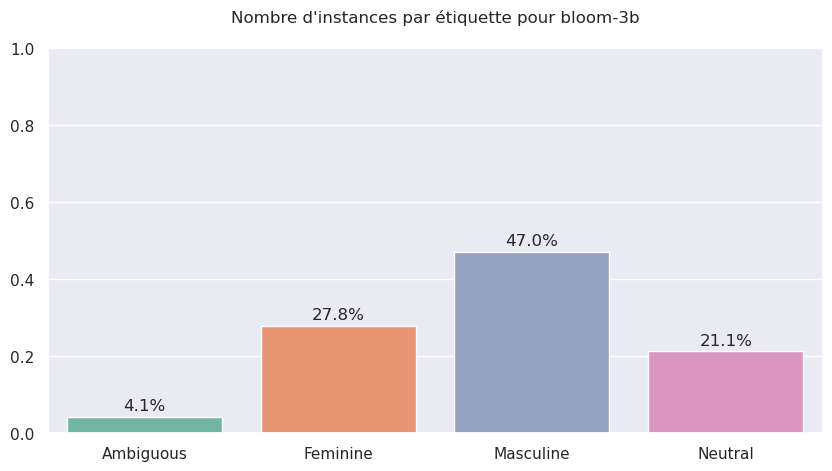

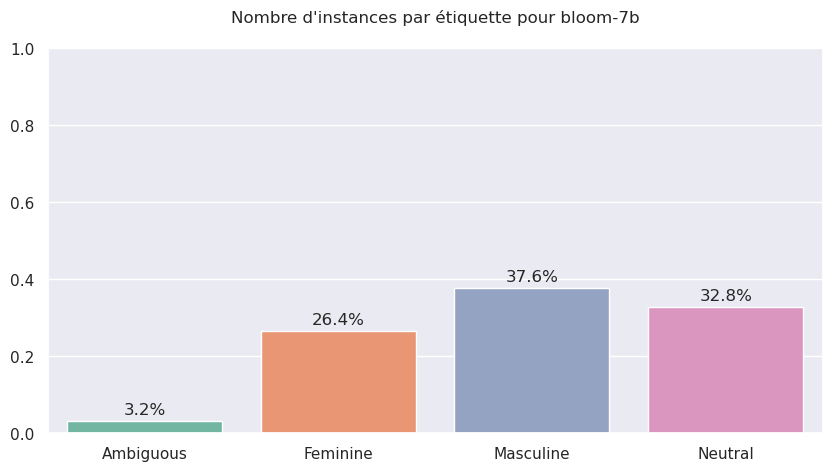

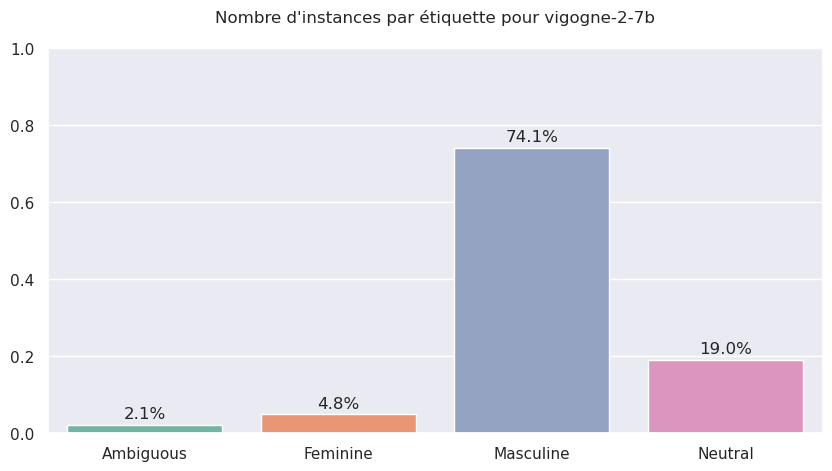

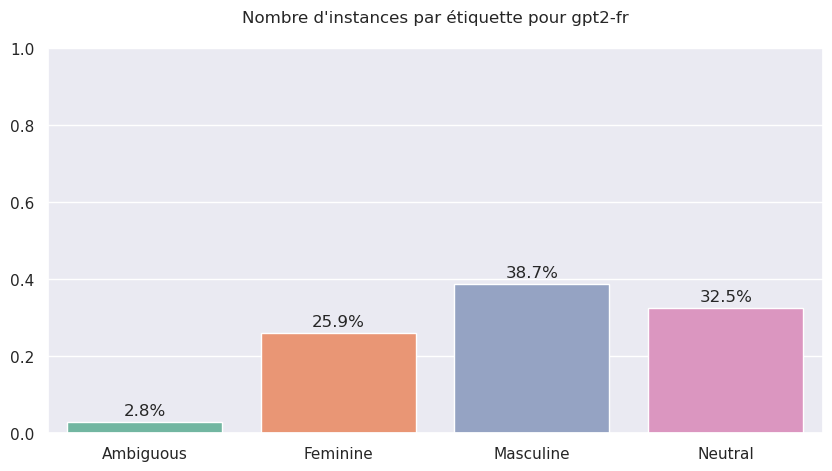

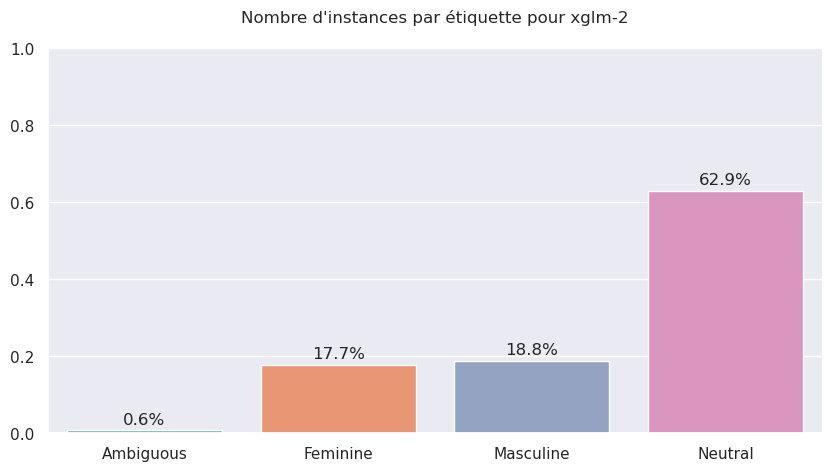

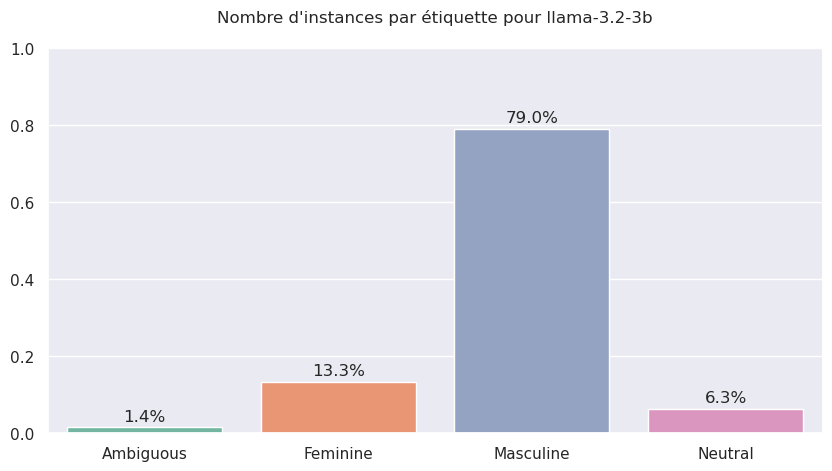

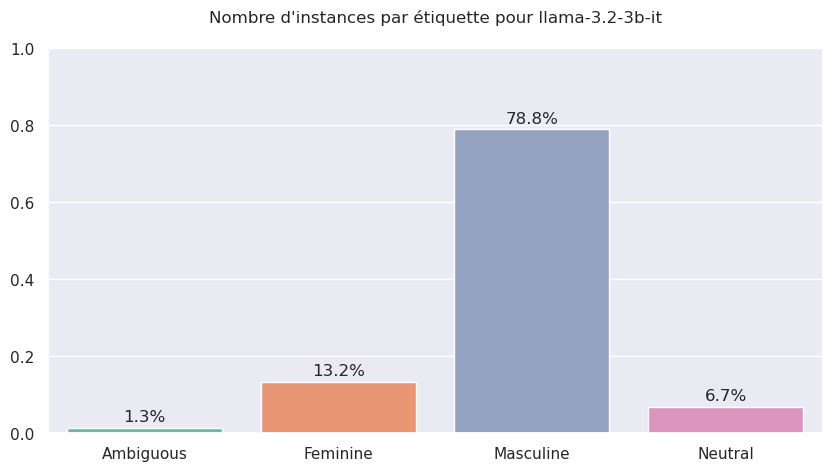

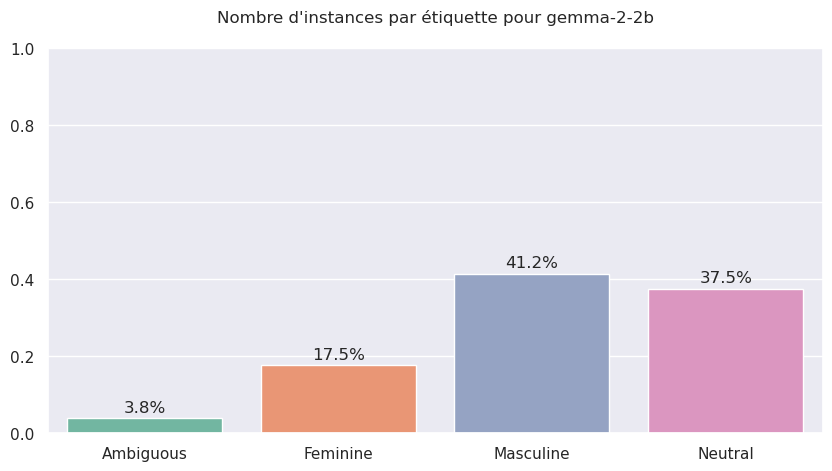

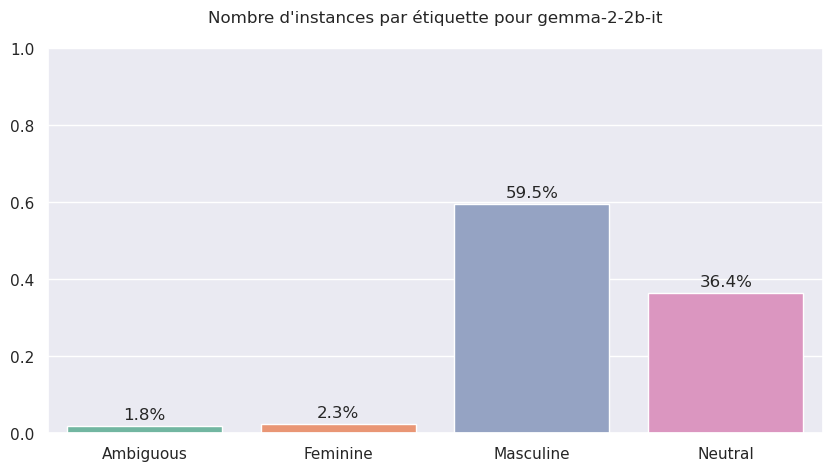

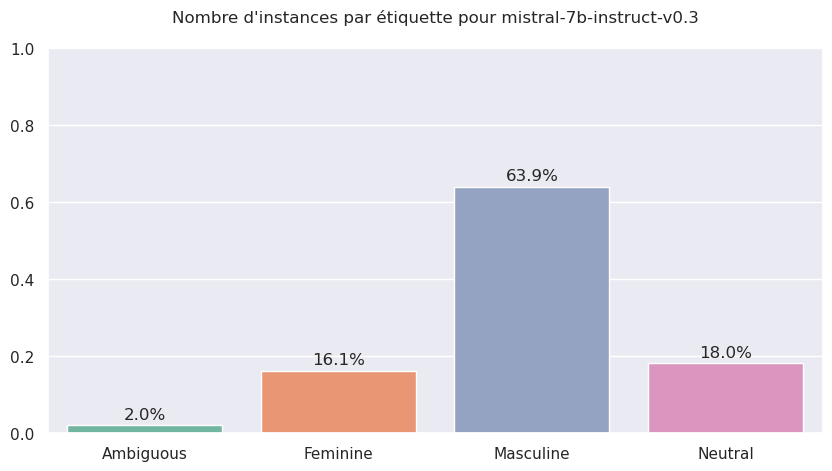

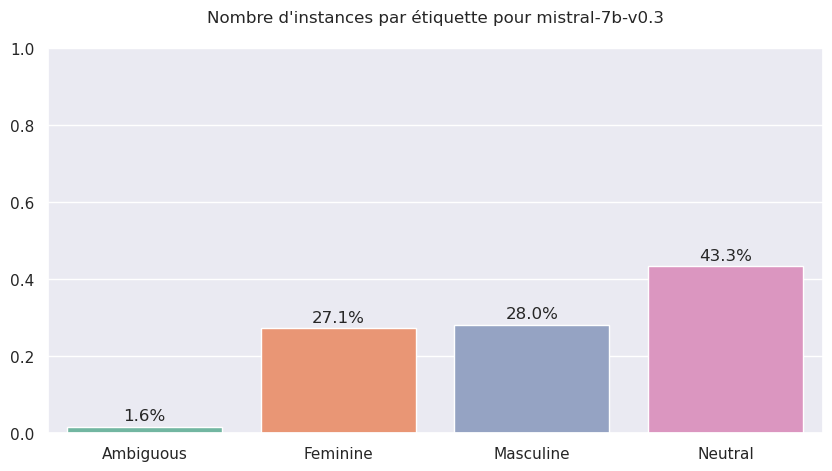

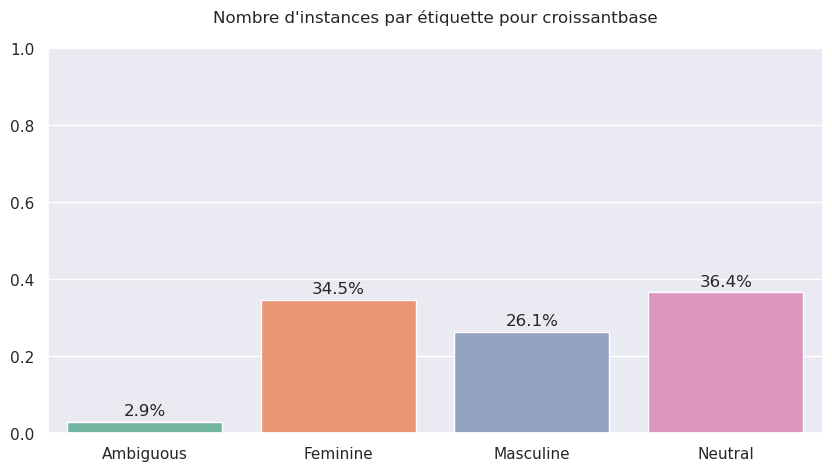

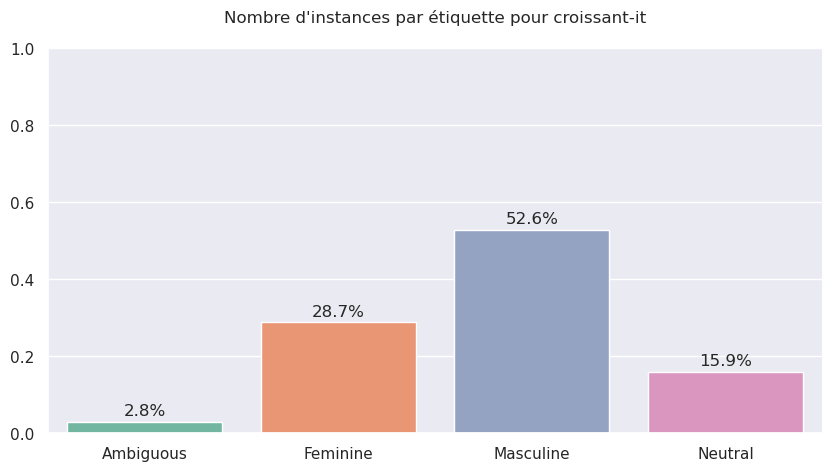

In [79]:
import warnings
def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    #sns.barplot(x_fig.index,x_fig).set(title=titre)
    colors = sns.color_palette("Set2", len(x))
    ax = sns.barplot(x=x_fig.index, y=x_fig, order=sorted(x.index), palette=colors)
    ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_ylim(0.0,1.0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/figure/auto_genre-model_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

Identified_gender
Masculine    49.4%
Neutral      28.9%
Feminine     19.3%
Ambiguous     2.4%
Name: proportion, dtype: object


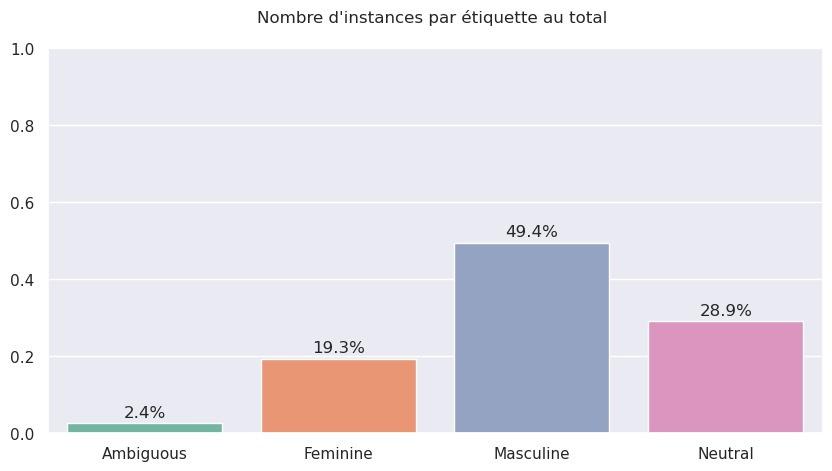

In [80]:
"""TOTAL"""

dataset = data_genre
golden_gender = label
#print("Nombre de lignes et de colonnes :", dataset.shape)
x_fig = dataset[golden_gender].value_counts(normalize=True)
x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
"""plt.figure()
dataset[golden_gender].hist()
plt.show()"""

titre = f"Nombre d'instances par étiquette au total \n"
#print(f"\nNombre de générations par genre pour {model}\n", x)
print(x)

plt.figure()
#sns.barplot(x_fig.index,x_fig).set(title=titre)
colors = sns.color_palette("Set2", len(x))
ax = sns.barplot(x=x_fig.index, y=x_fig, order=sorted(x.index), palette=colors)
ax.set(title=titre)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_ylim(0.0,1.0)
for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

#plt.savefig(f"analyse_fig-tables/{titre}_fem_.png")


[{'Neutral': '43.2%', 'Masculine': '34.4%', 'Feminine': '18.5%', 'Ambiguous': '3.9%', 'model': 'bloom-560m'}, {'Masculine': '47.0%', 'Feminine': '27.8%', 'Neutral': '21.1%', 'Ambiguous': '4.1%', 'model': 'bloom-3b'}, {'Masculine': '37.6%', 'Neutral': '32.8%', 'Feminine': '26.4%', 'Ambiguous': '3.2%', 'model': 'bloom-7b'}, {'Masculine': '74.1%', 'Neutral': '19.0%', 'Feminine': '4.8%', 'Ambiguous': '2.1%', 'model': 'vigogne-2-7b'}, {'Masculine': '38.7%', 'Neutral': '32.5%', 'Feminine': '25.9%', 'Ambiguous': '2.8%', 'model': 'gpt2-fr'}, {'Neutral': '62.9%', 'Masculine': '18.8%', 'Feminine': '17.7%', 'Ambiguous': '0.6%', 'model': 'xglm-2'}, {'Masculine': '79.0%', 'Feminine': '13.3%', 'Neutral': '6.3%', 'Ambiguous': '1.4%', 'model': 'llama-3.2-3b'}, {'Masculine': '78.8%', 'Feminine': '13.2%', 'Neutral': '6.7%', 'Ambiguous': '1.3%', 'model': 'llama-3.2-3b-it'}, {'Masculine': '41.2%', 'Neutral': '37.5%', 'Feminine': '17.5%', 'Ambiguous': '3.8%', 'model': 'gemma-2-2b'}, {'Masculine': '59.5%', 

[]

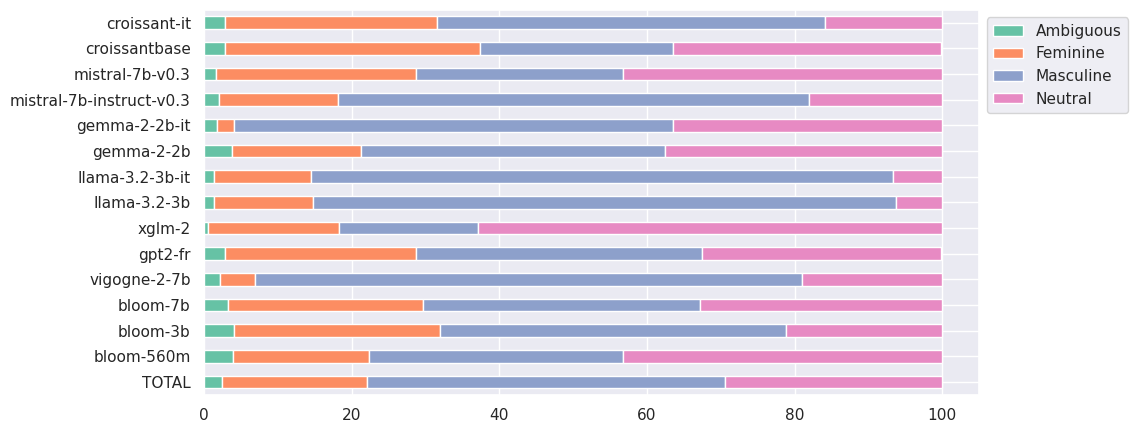

In [81]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig(f"../../results/FR/bias_evaluation/figure/gender_distributions_per_model_fr.png",bbox_inches = "tight",dpi=300)
ax.plot()

[{'Neutral': '43.2%', 'Masculine': '34.4%', 'Feminine': '18.5%', 'Ambiguous': '3.9%', 'model': 'bloom-560m', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '47.0%', 'Feminine': '27.8%', 'Neutral': '21.1%', 'Ambiguous': '4.1%', 'model': 'bloom-3b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '37.6%', 'Neutral': '32.8%', 'Feminine': '26.4%', 'Ambiguous': '3.2%', 'model': 'bloom-7b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '74.1%', 'Neutral': '19.0%', 'Feminine': '4.8%', 'Ambiguous': '2.1%', 'model': 'vigogne-2-7b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '38.7%', 'Neutral': '32.5%', 'Feminine': '25.9%', 'Ambiguous': '2.8%', 'model': 'gpt2-fr', 'Ambigu': '0%', 'Neutre': '0%'}, {'Neutral': '62.9%', 'Masculine': '18.8%', 'Feminine': '17.7%', 'Ambiguous': '0.6%', 'model': 'xglm-2', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '79.0%', 'Feminine': '13.3%', 'Neutral': '6.3%', 'Ambiguous': '1.4%', 'model': 'llama-3.2-3b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '78.8%'

[]

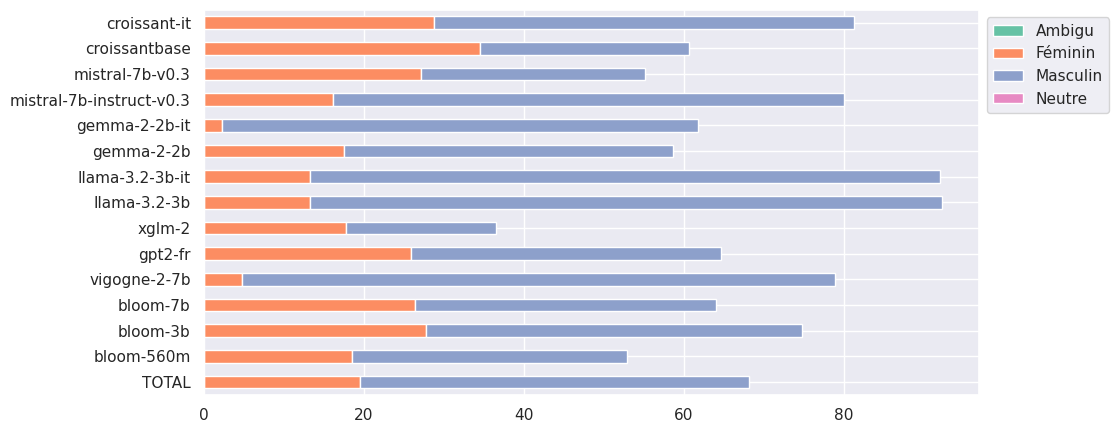

In [82]:
for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
    if "Neutre" not in d:
        d["Neutre"]="0%"
table_new = [{"Neutre":float(d["Neutre"][:-1]), "Féminin":float(d["Feminine"][:-1]),
             "Masculin":float(d["Masculine"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculin", "Féminin", "Neutre", "Ambigu"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("../../results/FR/bias_evaluation/figure/auto_gender_per_model_fr.png",bbox_inches = "tight")
ax.plot()

In [83]:
def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["theme"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"
    #print(f"\nNombre de générations par genre pour {topic}\n", x)
    
    #plt.figure()
    #sns.barplot(x_fig.index,x_fig).set(title=titre)
    if savefig:
        plt.savefig(f"../../results/bias_evaluation/figure/auto_{label}_{topic}.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

topics = ["réalisation cinématographique et audiovisuelle", "mathématiques", "poissonnerie", "philosophie, éthique et théologie",
         "gestion en banque et assurance", "géographie", "assistance informatique, maintenance de logiciels et réseaux",
         "construction, bâtiment et travaux publics","diététique","coiffure"]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  ------------------------------------------------------------
57.2%        26.7%      14.8%       1.3%         réalisation cinématographique et audiovisuelle
63.0%        23.4%      12.0%       1.6%         mathématiques
54.1%        27.8%      16.1%       1.9%         poissonnerie
53.8%        25.8%      17.9%       2.5%         philosophie, éthique et théologie
49.7%        33.7%      15.4%       1.3%         gestion en banque et assurance
53.3%        29.7%      15.2%       1.9%         géographie
58.5%        31.0%      7.6%        2.8%         assistance informatique, maintenance de logiciels et réseaux
67.2%        26.9%      3.9%        2.0%         construction, bâtiment et travaux publics
21.9%        27.7%      44.1%       6.4%         diététique
30.2%        25.8%      39.9%       4.1%         coiffure


[{'Masculine': '57.2%', 'Neutral': '26.7%', 'Feminine': '14.8%', 'Ambiguous': '1.3%', 'topic': 'réalisation cinématographique et audiovisuelle', 'Ambigu': '0%'}, {'Masculine': '63.0%', 'Neutral': '23.4%', 'Feminine': '12.0%', 'Ambiguous': '1.6%', 'topic': 'mathématiques', 'Ambigu': '0%'}, {'Masculine': '54.1%', 'Neutral': '27.8%', 'Feminine': '16.1%', 'Ambiguous': '1.9%', 'topic': 'poissonnerie', 'Ambigu': '0%'}, {'Masculine': '53.8%', 'Neutral': '25.8%', 'Feminine': '17.9%', 'Ambiguous': '2.5%', 'topic': 'philosophie, éthique et théologie', 'Ambigu': '0%'}, {'Masculine': '49.7%', 'Neutral': '33.7%', 'Feminine': '15.4%', 'Ambiguous': '1.3%', 'topic': 'gestion en banque et assurance', 'Ambigu': '0%'}, {'Masculine': '53.3%', 'Neutral': '29.7%', 'Feminine': '15.2%', 'Ambiguous': '1.9%', 'topic': 'géographie', 'Ambigu': '0%'}, {'Masculine': '58.5%', 'Neutral': '31.0%', 'Feminine': '7.6%', 'Ambiguous': '2.8%', 'topic': 'assistance informatique, maintenance de logiciels et réseaux', 'Ambigu'

[]

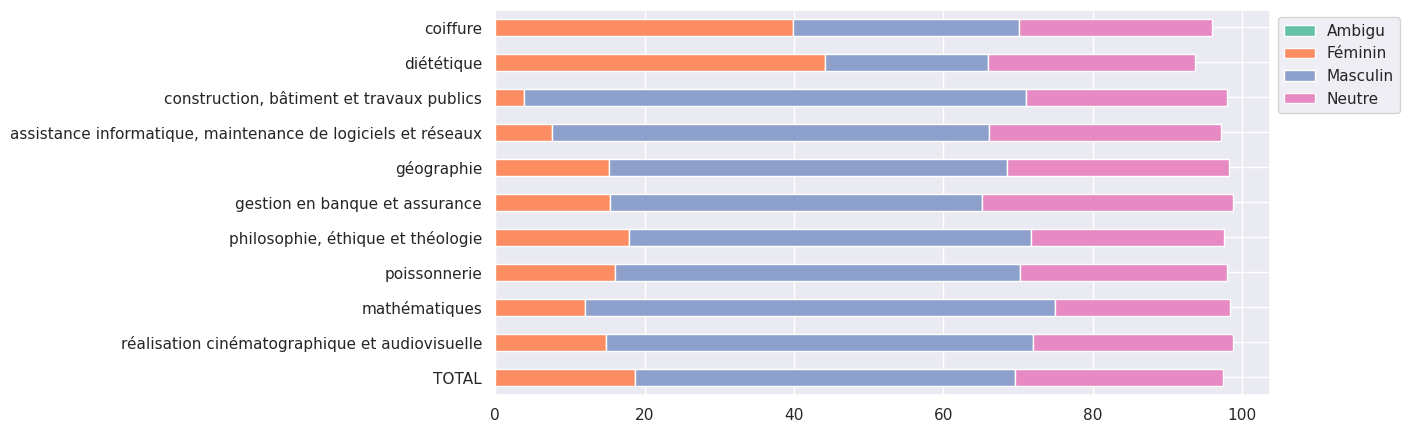

In [84]:
# for d in table:
#     if "Ambiguous" not in d:
#         d["Ambiguous"]="0%"
        
# table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
#              "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]

for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"

print (table)
table_new = [{"Neutre":float(d["Neutral"][:-1]), "Féminin":float(d["Feminine"][:-1]),
             "Masculin":float(d["Masculine"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]

# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculin", "Féminin", "Neutre", "Ambigu"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("../../results/FR/bias_evaluation/figure/auto_gender_per_topic_10gold_fr.png",bbox_inches = "tight")
ax.plot()

In [85]:
all_topics = list(set(data_genre["theme"]))
for topic in all_topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'),)

Masculine    Neutral    Feminine    Ambiguous    topic                                                                                                   Ambigu
-----------  ---------  ----------  -----------  ------------------------------------------------------------------------------------------------------  --------
57.2%        26.7%      14.8%       1.3%         réalisation cinématographique et audiovisuelle                                                          0%
63.0%        23.4%      12.0%       1.6%         mathématiques                                                                                           0%
54.1%        27.8%      16.1%       1.9%         poissonnerie                                                                                            0%
53.8%        25.8%      17.9%       2.5%         philosophie, éthique et théologie                                                                       0%
49.7%        33.7%      15.4%       1.3%         gesti

In [86]:
"""PRENDRE 10 AUTRES THÈMES, CEUX AVEC + GRANDS ET + PETITS GAPS ENTRE FÉM ET MASC ?
TESTER AUSSI JUSTE + HAUTS MASC, + HAUTS FEM, + HAUTS NEUTRES"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['theme']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic et gap
    neutre = {} #part de neutre (pour l'axe y d'une figure)
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masculine, si négatif, biaisé vers Feminine
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        try:
            neutre[topic] = float(op['Neutral'][:-1])
        except KeyError:
            neutre[topic] = 0
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap, neutre

all_sorted_gap, all_masc_gap, all_fem_gap, neutre = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))
#print(neutre)

178 25


In [87]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 maçonnerie
2 conduite d'engins de chantier
3 electricité électronique
4 mécanique aéronautique et spatiale
5 installation et maintenance en froid, conditionnement d'air
6 construction, bâtiment et travaux publics
7 soudage manuel
8 bûcheronnage et élagage
9 gestion de portefeuilles sur les marchés financiers
10 réparation de carrosserie
11 conduite d'engins agricoles et forestiers
12 boucherie
13 mécanique générale et de précision
14 fabrication et réparation d'instruments de musique
15 ingénierie et études du btp
16 conduite de grue
17 films d'animation et effets spéciaux
18 chaudronnerie - tôlerie
19 pose de canalisations
20 navigation fluviale
21 direction de chantier du btp
22 méthodes et gestion de production en chaudronnerie et métallerie
23 métré en métallerie
24 réalisation et montage en tuyauterie
25 encadrement de la navigation maritime
26 maintenance informatique et bureautique
27 machinerie spectacle
28 physique
29 information météorologique
30 montage audiovisuel et post

In [88]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap):
    print(i+1,el[0])

1 maçonnerie
2 conduite d'engins de chantier
3 electricité électronique
4 mécanique aéronautique et spatiale
5 installation et maintenance en froid, conditionnement d'air
6 construction, bâtiment et travaux publics
7 soudage manuel
8 bûcheronnage et élagage
9 gestion de portefeuilles sur les marchés financiers
10 réparation de carrosserie
11 conduite d'engins agricoles et forestiers
12 boucherie
13 mécanique générale et de précision
14 fabrication et réparation d'instruments de musique
15 ingénierie et études du btp
16 conduite de grue
17 films d'animation et effets spéciaux
18 chaudronnerie - tôlerie
19 pose de canalisations
20 navigation fluviale
21 direction de chantier du btp
22 méthodes et gestion de production en chaudronnerie et métallerie
23 métré en métallerie
24 réalisation et montage en tuyauterie
25 encadrement de la navigation maritime
26 maintenance informatique et bureautique
27 machinerie spectacle
28 physique
29 information météorologique
30 montage audiovisuel et post

In [89]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap):
    print(i+1,el[0])

1 aide en puériculture
2 soins infirmiers spécialisés en puériculture
3 mannequinat et pose artistique
4 secrétariat et assistanat médical ou médico-social
5 esthétique
6 éducation de jeunes enfants
7 diététique
8 coiffure, esthétique et autres spécialites de services aux personnes
9 danse
10 création textile
11 secrétariat comptable
12 dentellerie, broderie
13 accompagnement et médiation familiale
14 accueil touristique
15 stylisme
16 maquillage de scène
17 services domestiques
18 coiffure
19 retouches en habillement
20 psychopédagogie
21 orthophonie
22 soins infirmiers généralistes
23 interprétariat et traduction
24 psychologie de la santé
25 costume et habillage spectacle


In [90]:
# \textbf{Ambiguous}       & 0,200     & 0,571  & 0,296    & 7       \\ \hline
for i,el in enumerate(all_masc_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  maçonnerie  &  66.4 \\ \hline
2  &  conduite d'engins de chantier  &  64.7 \\ \hline
3  &  electricité électronique  &  64.3 \\ \hline
4  &  mécanique aéronautique et spatiale  &  63.8 \\ \hline
5  &  installation et maintenance en froid, conditionnement d'air  &  63.3 \\ \hline
6  &  construction, bâtiment et travaux publics  &  63.3 \\ \hline
7  &  soudage manuel  &  62.7 \\ \hline
8  &  bûcheronnage et élagage  &  62.2 \\ \hline
9  &  gestion de portefeuilles sur les marchés financiers  &  62.1 \\ \hline
10  &  réparation de carrosserie  &  62.0 \\ \hline
11  &  conduite d'engins agricoles et forestiers  &  61.7 \\ \hline
12  &  boucherie  &  61.1 \\ \hline
13  &  mécanique générale et de précision  &  60.9 \\ \hline
14  &  fabrication et réparation d'instruments de musique  &  60.9 \\ \hline
15  &  ingénierie et études du btp  &  60.6 \\ \hline
16  &  conduite de grue  &  60.1 \\ \hline
17  &  films d'animation et effets spéciaux  &  59.2 \\ \hline
18  &  chaudronnerie - tôle

In [91]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  aide en puériculture  &  -39.7 \\ \hline
2  &  soins infirmiers spécialisés en puériculture  &  -36.4 \\ \hline
3  &  mannequinat et pose artistique  &  -29.4 \\ \hline
4  &  secrétariat et assistanat médical ou médico-social  &  -28.5 \\ \hline
5  &  esthétique  &  -27.5 \\ \hline
6  &  éducation de jeunes enfants  &  -23.7 \\ \hline
7  &  diététique  &  -22.2 \\ \hline
8  &  coiffure, esthétique et autres spécialites de services aux personnes  &  -17.1 \\ \hline
9  &  danse  &  -16.5 \\ \hline
10  &  création textile  &  -16.2 \\ \hline
11  &  secrétariat comptable  &  -13.1 \\ \hline
12  &  dentellerie, broderie  &  -12.9 \\ \hline
13  &  accompagnement et médiation familiale  &  -12.5 \\ \hline
14  &  accueil touristique  &  -11.3 \\ \hline
15  &  stylisme  &  -10.6 \\ \hline
16  &  maquillage de scène  &  -10.4 \\ \hline
17  &  services domestiques  &  -9.8 \\ \hline
18  &  coiffure  &  -9.7 \\ \hline
19  &  retouches en habillement  &  -9.7 \\ \hline
20  &  psychopédagogie 

In [92]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  aide en puériculture  &  -39.7 \\ \hline
2  &  soins infirmiers spécialisés en puériculture  &  -36.4 \\ \hline
3  &  mannequinat et pose artistique  &  -29.4 \\ \hline
4  &  secrétariat et assistanat médical ou médico-social  &  -28.5 \\ \hline
5  &  esthétique  &  -27.5 \\ \hline
6  &  éducation de jeunes enfants  &  -23.7 \\ \hline
7  &  diététique  &  -22.2 \\ \hline
8  &  coiffure, esthétique et autres spécialites de services aux personnes  &  -17.1 \\ \hline
9  &  danse  &  -16.5 \\ \hline
10  &  création textile  &  -16.2 \\ \hline
11  &  secrétariat comptable  &  -13.1 \\ \hline
12  &  dentellerie, broderie  &  -12.9 \\ \hline
13  &  accompagnement et médiation familiale  &  -12.5 \\ \hline
14  &  accueil touristique  &  -11.3 \\ \hline
15  &  stylisme  &  -10.6 \\ \hline
16  &  maquillage de scène  &  -10.4 \\ \hline
17  &  services domestiques  &  -9.8 \\ \hline
18  &  coiffure  &  -9.7 \\ \hline
19  &  retouches en habillement  &  -9.7 \\ \hline
20  &  psychopédagogie 

In [93]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

30.048275862068966

In [94]:
neutre

{'commerce, vente': 31.8,
 'assistance informatique, maintenance de logiciels et réseaux': 31.0,
 'electricité électronique': 24.9,
 'conseil clientèle en assurances': 34.3,
 'régie générale': 32.6,
 'biopharmacologie': 29.8,
 'chimie': 25.6,
 'secrétariat comptable': 27.2,
 'droit des affaires': 30.6,
 'langues vivantes, civilisations étrangères et régionales': 24.8,
 'élevage bovin ou équin': 29.8,
 "travail du bois et de l'ameublement": 32.5,
 'recherche agronomique': 30.2,
 'gestion de portefeuilles sur les marchés financiers': 28.2,
 'conseil en information médicale': 30.4,
 'magistrature': 28.3,
 'direction administrative et financière': 29.9,
 'service en restauration': 25.9,
 "géographie de l'aménagement et du développement": 26.6,
 'gestion de patrimoine culturel': 36.2,
 'aide en puériculture': 25.2,
 'droit, sciences politiques': 29.7,
 'toilettage des animaux': 23.8,
 "restauration des oeuvres d'art": 32.9,
 'coiffure, esthétique et autres spécialites de services aux person

In [95]:
new_added = ["theme,gap,neutre"]
for el in all_sorted_gap:
    new_added.append([el[0], el[1], neutre[el[0]]])
new_added

['theme,gap,neutre',
 ['maçonnerie', 66.39999999999999, 21.2],
 ["conduite d'engins de chantier", 64.7, 25.0],
 ['electricité électronique', 64.3, 24.9],
 ['mécanique aéronautique et spatiale', 63.800000000000004, 27.0],
 ["installation et maintenance en froid, conditionnement d'air",
  63.300000000000004,
  28.0],
 ['construction, bâtiment et travaux publics', 63.300000000000004, 26.9],
 ['soudage manuel', 62.699999999999996, 26.9],
 ['bûcheronnage et élagage', 62.2, 26.0],
 ['gestion de portefeuilles sur les marchés financiers',
  62.099999999999994,
  28.2],
 ['réparation de carrosserie', 62.0, 28.8],
 ["conduite d'engins agricoles et forestiers", 61.699999999999996, 28.5],
 ['boucherie', 61.099999999999994, 22.9],
 ['mécanique générale et de précision', 60.900000000000006, 27.8],
 ["fabrication et réparation d'instruments de musique",
  60.900000000000006,
  26.6],
 ['ingénierie et études du btp', 60.599999999999994, 23.5],
 ['conduite de grue', 60.099999999999994, 28.9],
 ["films 

In [96]:
import csv

with open("sorted_gap+neutre.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(new_added)

In [97]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  -----------------------------------------------------------
72.3%        21.2%      5.9%        0.6%         maçonnerie
69.2%        25.0%      4.5%        1.3%         conduite d'engins de chantier
69.7%        24.9%      5.4%                     electricité électronique
67.9%        27.0%      4.1%        0.9%         mécanique aéronautique et spatiale
67.2%        28.0%      3.9%        1.0%         installation et maintenance en froid, conditionnement d'air
16.1%        25.2%      55.8%       2.8%         aide en puériculture
15.9%        29.3%      52.3%       2.5%         soins infirmiers spécialisés en puériculture
20.3%        26.1%      49.7%       3.9%         mannequinat et pose artistique
19.1%        29.1%      47.6%       4.2%         secrétariat et assistanat médical ou médico-social
20.9%        28.4%      48.4%       2.2%         esthétique
[{'Ambiguous': 1.94, 'Femi

[]

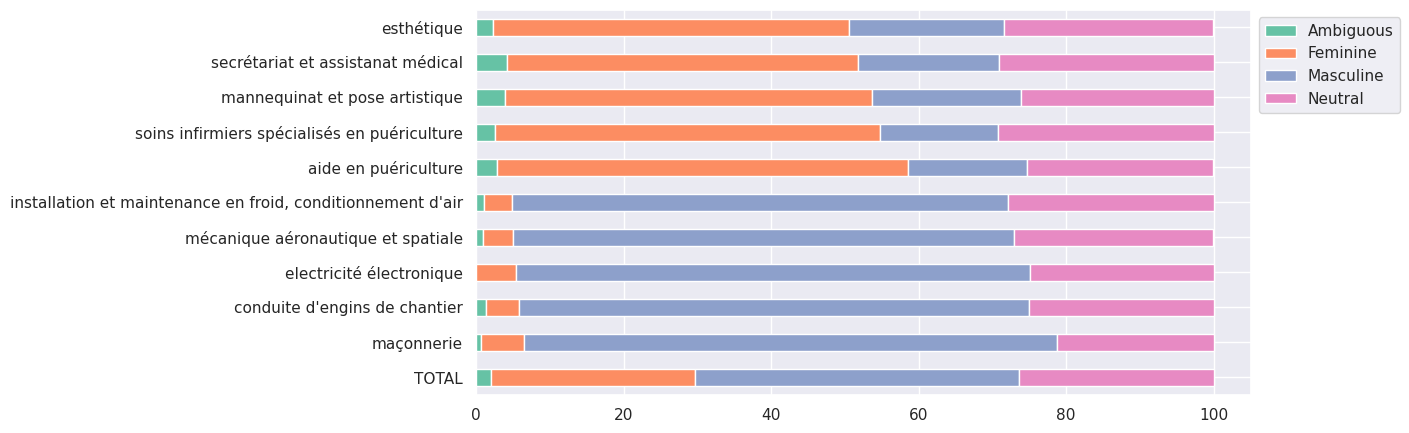

In [98]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""
masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

label_topics = ['secrétariat et assistanat médical' if 'médico-social' in item else item for item in topics]

df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig(f"../../results/FR/bias_evaluation/figure/10mostbiased_neutral_fr.png",bbox_inches = "tight", dpi=300)
ax.plot()

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  -----------------------------------------------------------
72.3%        21.2%      5.9%        0.6%         maçonnerie
69.2%        25.0%      4.5%        1.3%         conduite d'engins de chantier
69.7%        24.9%      5.4%                     electricité électronique
67.9%        27.0%      4.1%        0.9%         mécanique aéronautique et spatiale
67.2%        28.0%      3.9%        1.0%         installation et maintenance en froid, conditionnement d'air
16.1%        25.2%      55.8%       2.8%         aide en puériculture
15.9%        29.3%      52.3%       2.5%         soins infirmiers spécialisés en puériculture
20.3%        26.1%      49.7%       3.9%         mannequinat et pose artistique
19.1%        29.1%      47.6%       4.2%         secrétariat et assistanat médical ou médico-social
20.9%        28.4%      48.4%       2.2%         esthétique
[{'Ambigu': 0.0, 'Féminin'

[]

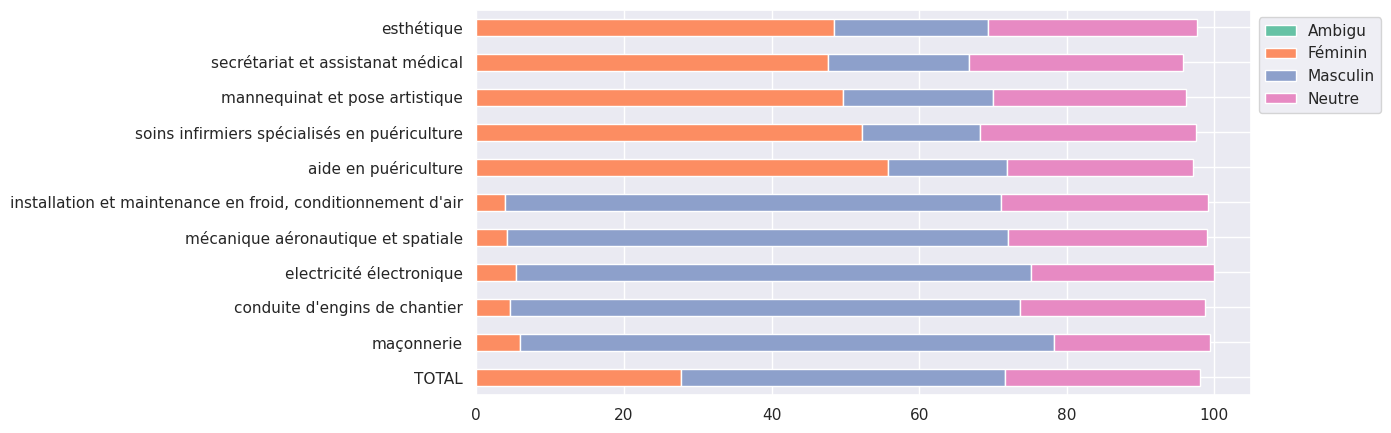

In [99]:
"""FIGURE ET TABLEAU POUR CES THÈMES FR"""
masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
        
table_new = [{"Neutre":float(d["Neutral"][:-1]), "Féminin":float(d["Feminine"][:-1]),
             "Masculin":float(d["Masculine"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculin", "Féminin", "Neutre", "Ambigu"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

label_topics = ['secrétariat et assistanat médical' if 'médico-social' in item else item for item in topics]

df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("../../results/FR/bias_evaluation/figure/gender_per_topic_10biased_fr.png",bbox_inches = "tight")
ax.plot()

In [100]:
all_topics = list(set(data_genre["theme"]))
means = {"total":mean_gap_total}
for model in modeles:
    #sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    sorted_gap, masc_gap, fem_gap, neutre = biased_topics(all_topics, data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=mean_gap
    
means

{'total': 30.048275862068966,
 'bloom-560m': 15.8192118226601,
 'bloom-3b': 18.947783251231527,
 'bloom-7b': 11.036945812807883,
 'vigogne-2-7b': 69.22955665024631,
 'gpt2-fr': 12.813793103448274,
 'xglm-2': 1.0758620689655172,
 'llama-3.2-3b': 65.69852216748768,
 'llama-3.2-3b-it': 65.57487684729064,
 'gemma-2-2b': 23.70344827586207,
 'gemma-2-2b-it': 57.183251231527095,
 'mistral-7b-instruct-v0.3': 47.672413793103445,
 'mistral-7b-v0.3': 0.7113300492610838,
 'croissantbase': -8.145320197044335,
 'croissant-it': 23.893103448275863}

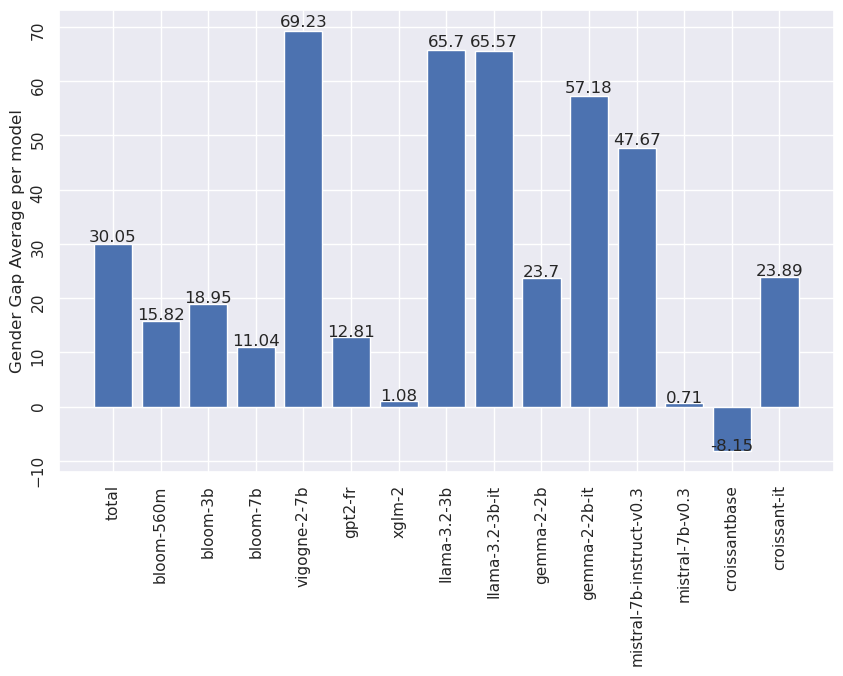

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
#ax.set_ylabel("Moyenne d'Écart Genré par thème")
ax.set_ylabel("Gender Gap Average per model")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center')#,
             #weight='bold')
    i+=1
    
plt.savefig(f"../../results/FR/bias_evaluation/figure/gendergap_per_model_neutral_fr.png", bbox_inches="tight", dpi=300)


 bloom-560m
Masculine    Neutral    Feminine    topic                                                                                                   Ambiguous
-----------  ---------  ----------  ------------------------------------------------------------------------------------------------------  -----------
66.7%        28.6%      4.8%        langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation
57.9%        36.8%      5.3%        mécanique aéronautique et spatiale
57.1%        33.3%      4.8%        conduite de grue                                                                                        4.8%
58.3%        29.2%      8.3%        sciences de la terre                                                                                    4.2%
54.5%        40.9%      4.5%        aménagement paysager
5.3%         52.6%      36.8%       stylisme                                                                                    

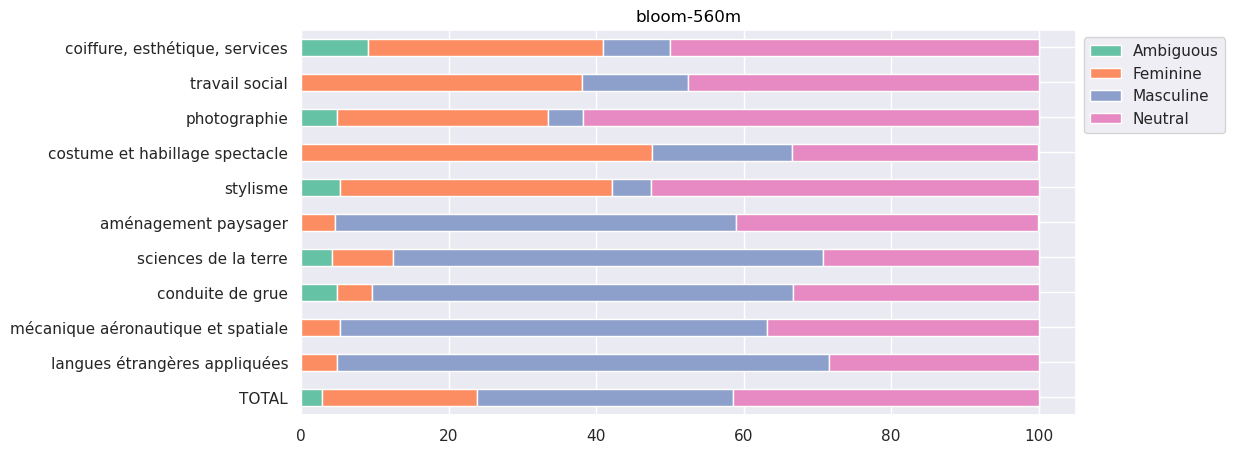

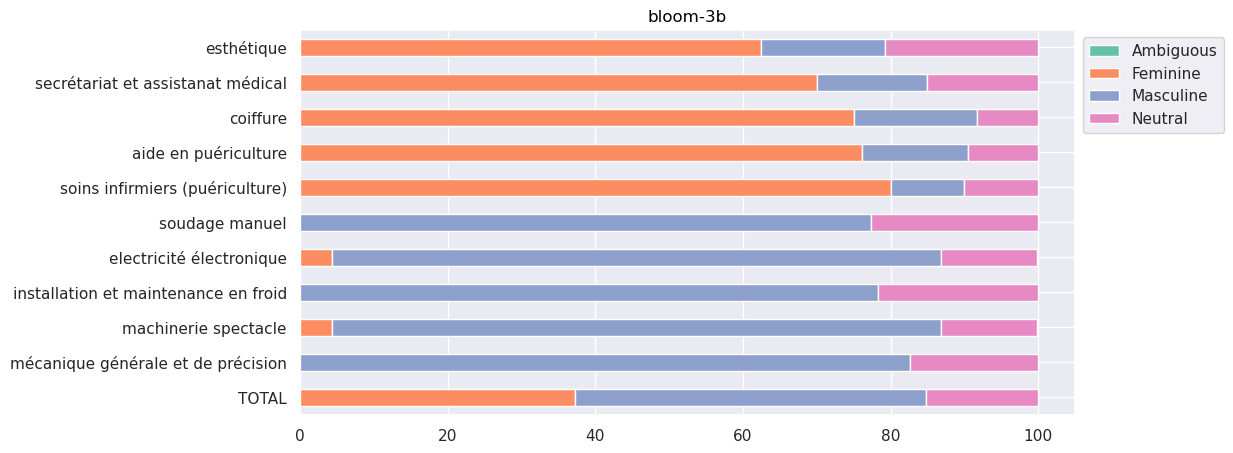

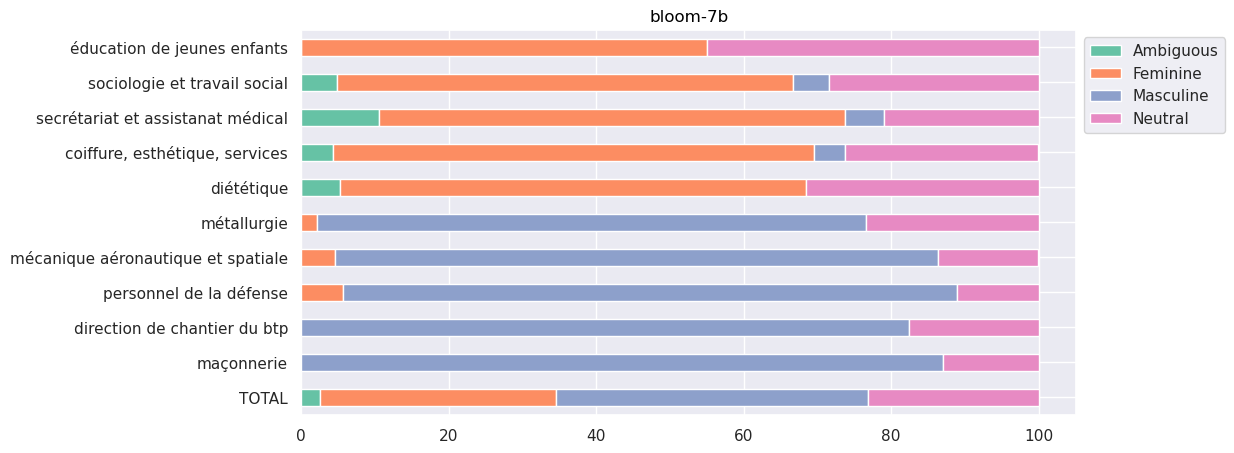

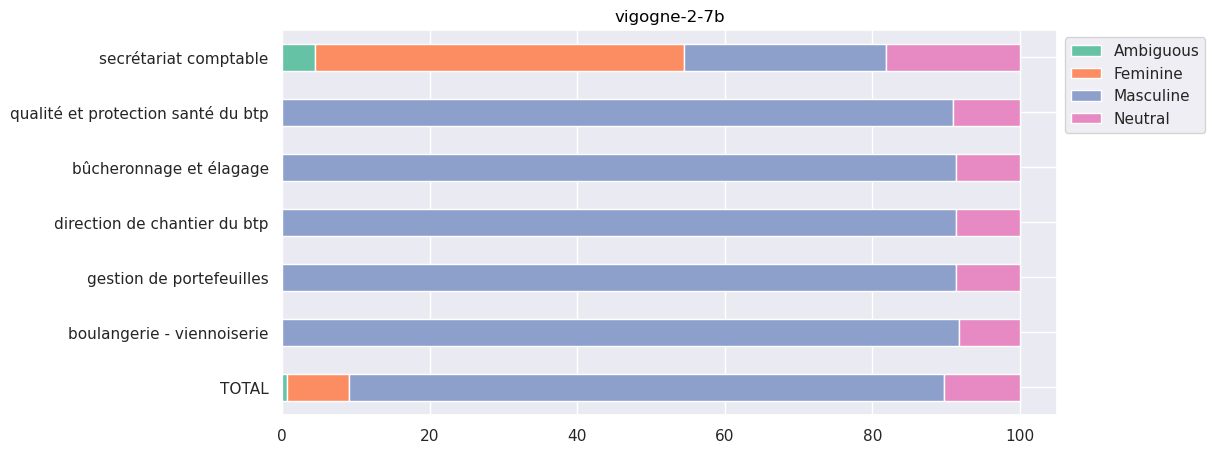

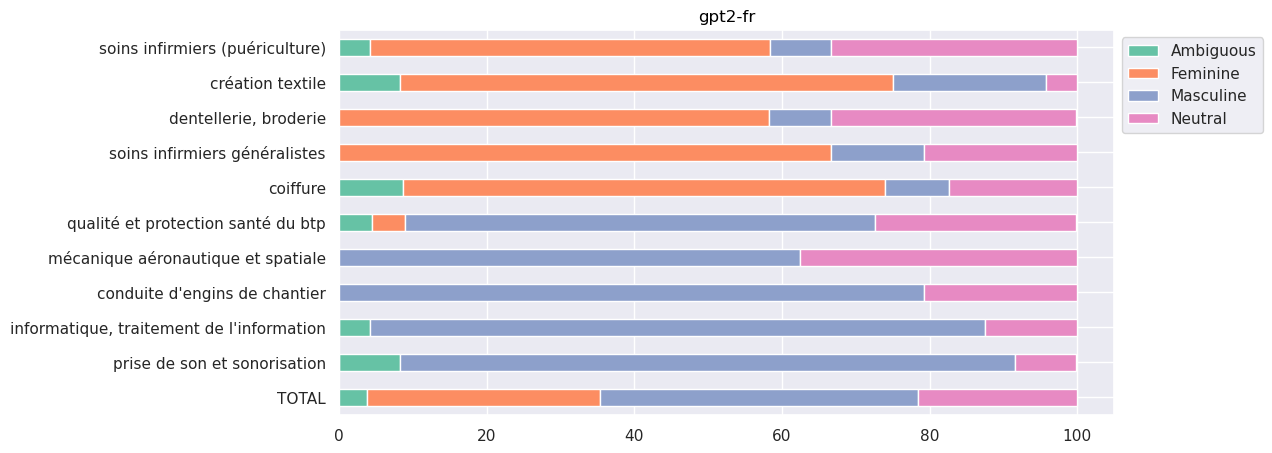

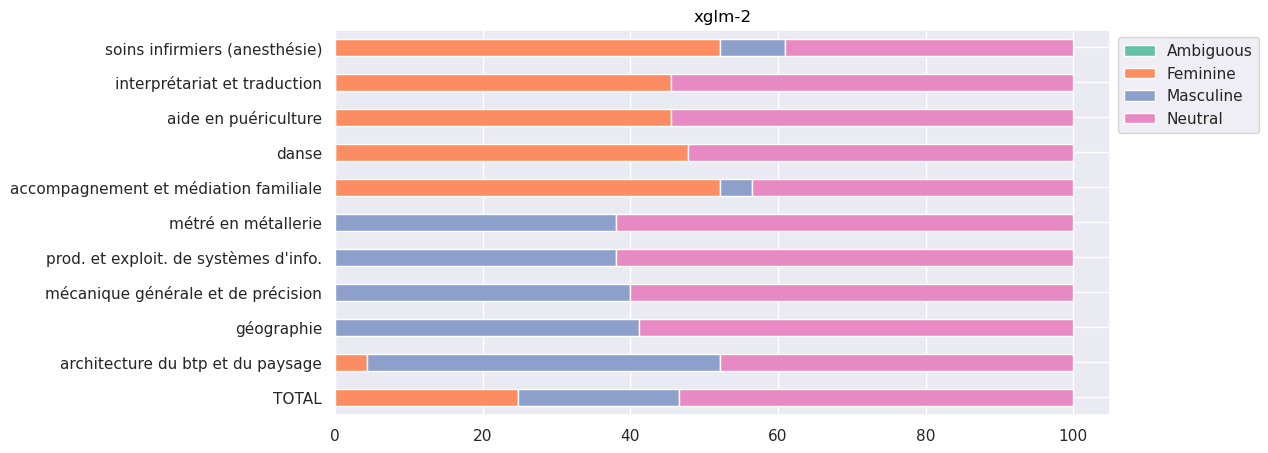

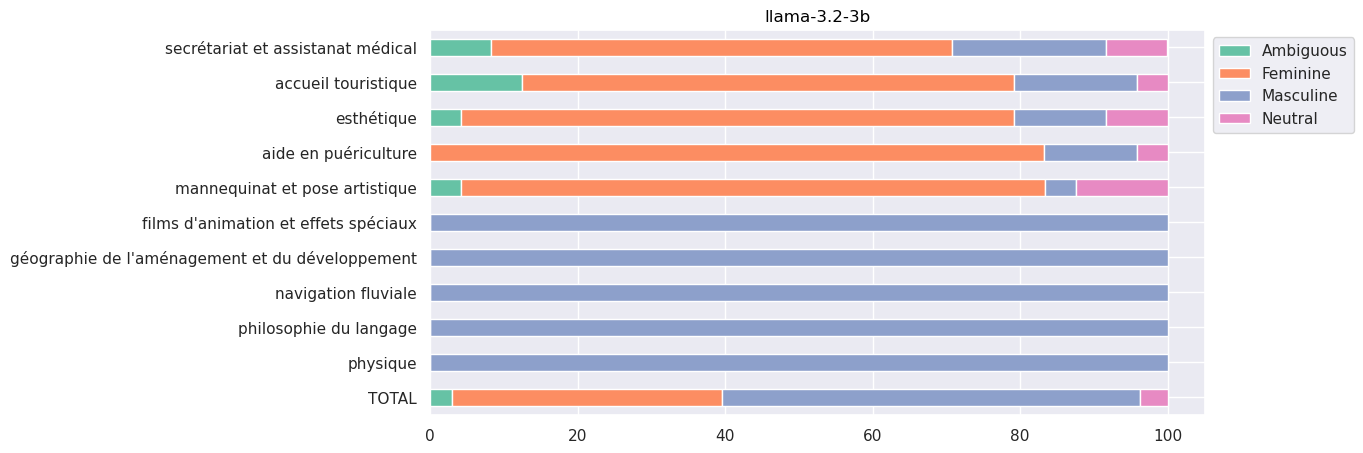

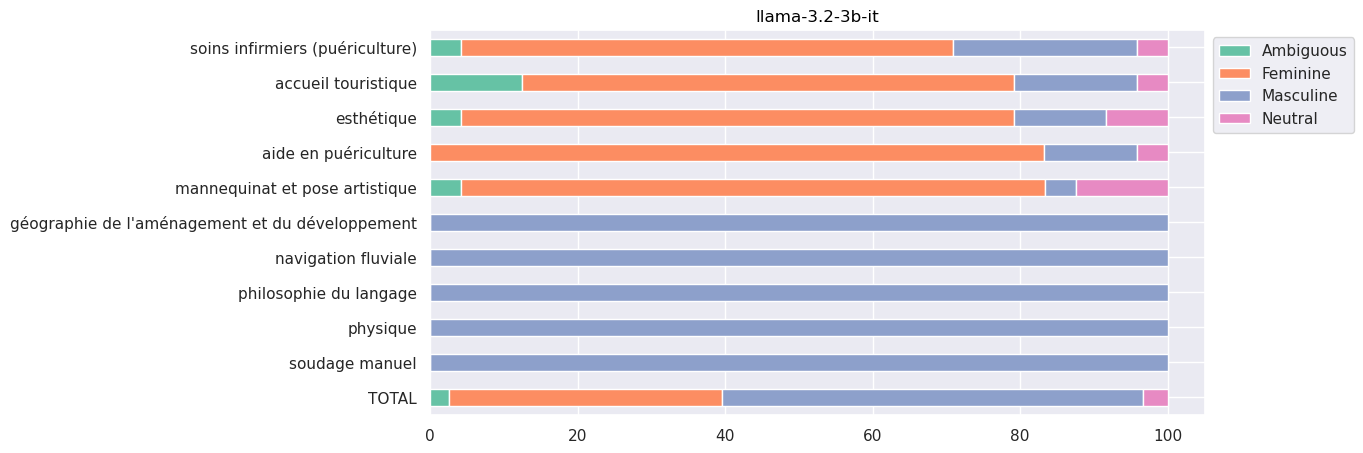

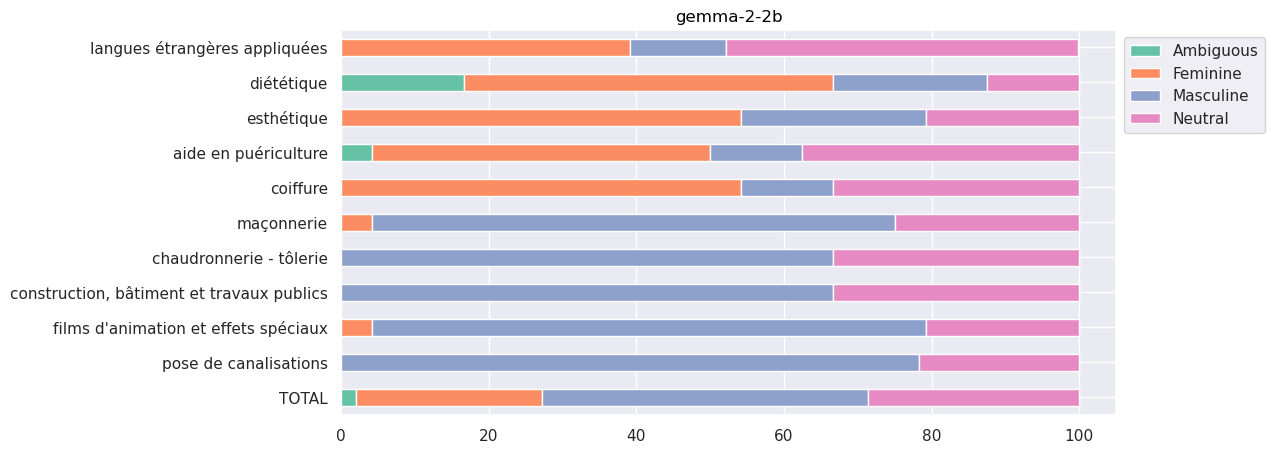

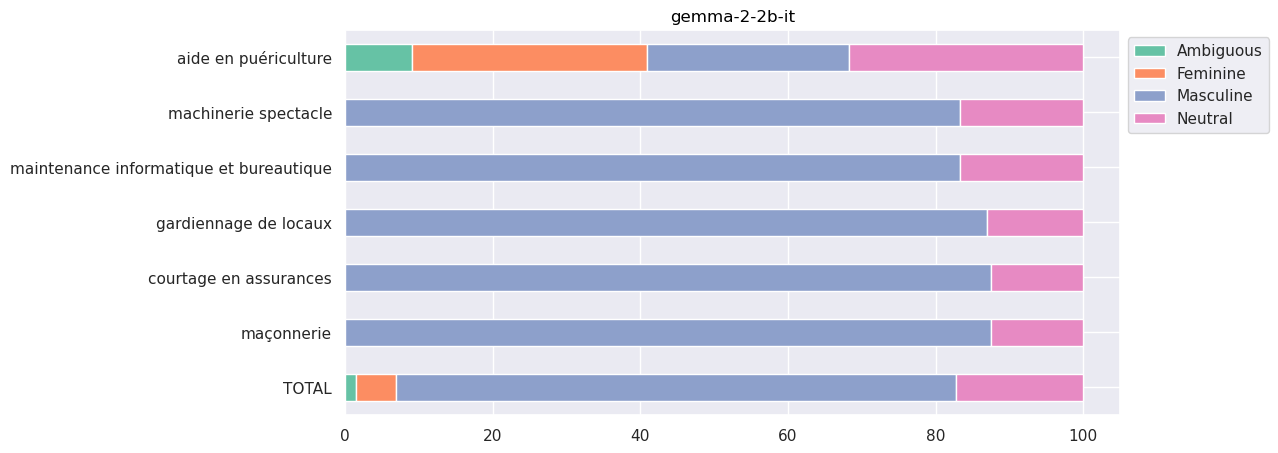

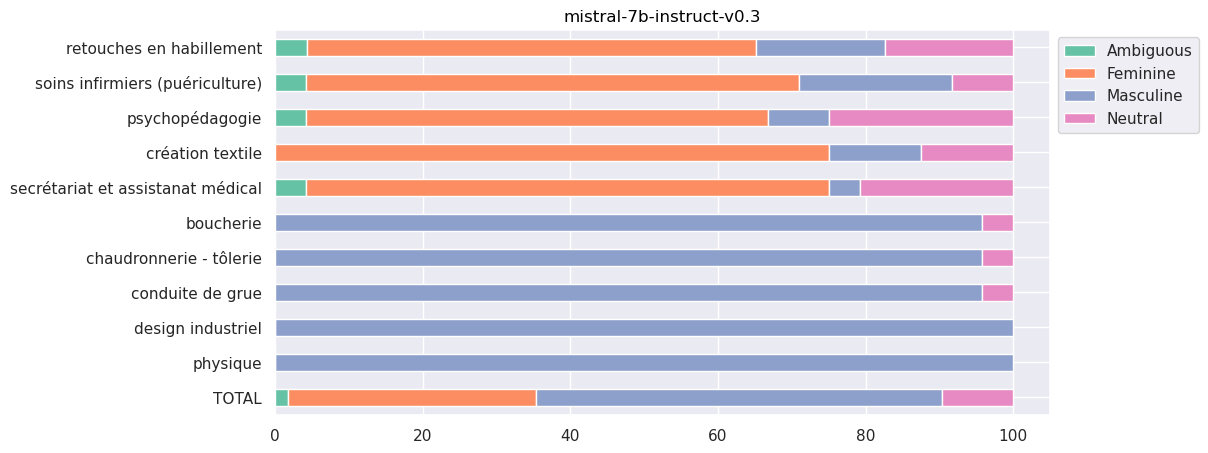

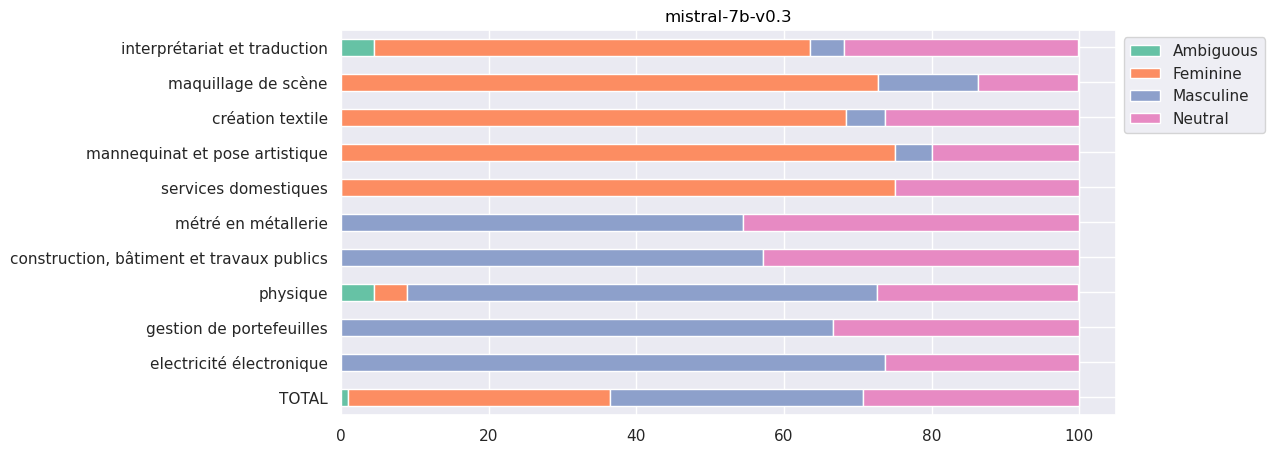

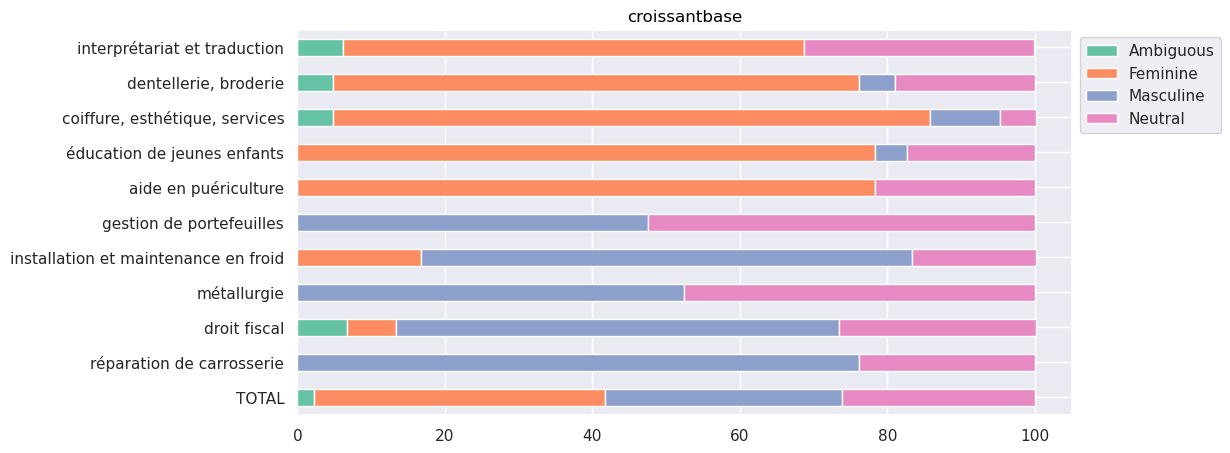

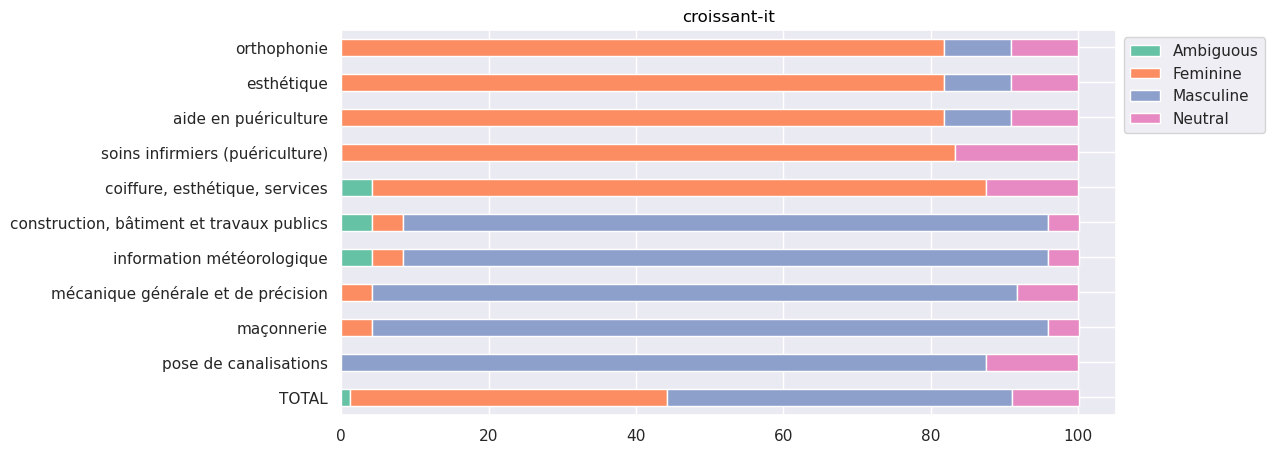

In [102]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["theme"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["theme"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap, neutre = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in sorted(["Neutral","Feminine", "Masculine","Ambiguous"]):
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

    label_topics = ["secrétariat et assistanat médical" if "secrétariat et assistanat médical ou médico-social" in item else item for item in topics]
    label_topics = ["langues étrangères appliquées" if "langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation" in item else item for item in label_topics]
    label_topics = ["installation et maintenance en froid" if "conditionnement d'air" in item else item for item in label_topics]
    label_topics = ["coiffure, esthétique, services" if "autres spécialites de services" in item else item for item in label_topics]
    label_topics = ["prod. et exploit. de systèmes d'info." if "systèmes d'information" in item else item for item in label_topics]
    label_topics = ["qualité et protection santé du btp" if "protection santé du btp" in item else item for item in label_topics]
    label_topics = ["gestion de portefeuilles" if "portefeuilles" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (puériculture)" if "spécialisés en puériculture" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (anesthésie)" if "spécialisés en anesthésie" in item else item for item in label_topics]

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f"../../results/FR/bias_evaluation/figure/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()

In [103]:
from collections import Counter 
mix_t = []
for l in topic_mod.values():
    for el in l:
        mix_t.append(el)
Counter(mix_t).most_common()

[('aide en puériculture', 8),
 ('soins infirmiers spécialisés en puériculture', 5),
 ('esthétique', 5),
 ('coiffure, esthétique et autres spécialites de services aux personnes', 4),
 ('secrétariat et assistanat médical ou médico-social', 4),
 ('maçonnerie', 4),
 ('physique', 4),
 ('mécanique aéronautique et spatiale', 3),
 ('mécanique générale et de précision', 3),
 ('coiffure', 3),
 ('gestion de portefeuilles sur les marchés financiers', 3),
 ('création textile', 3),
 ('interprétariat et traduction', 3),
 ('mannequinat et pose artistique', 3),
 ('construction, bâtiment et travaux publics', 3),
 ('langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation',
  2),
 ('conduite de grue', 2),
 ('machinerie spectacle', 2),
 ("installation et maintenance en froid, conditionnement d'air", 2),
 ('electricité électronique', 2),
 ('soudage manuel', 2),
 ('direction de chantier du btp', 2),
 ('métallurgie', 2),
 ('diététique', 2),
 ('éducation de jeunes


 pose de canalisations
Neutral    Masculine    Ambiguous    model                     Feminine
---------  -----------  -----------  ------------------------  ----------
52.9%      35.3%        11.8%        bloom-560m
18.2%      63.6%                     bloom-3b                  18.2%
30.0%      60.0%                     bloom-7b                  10.0%
15.0%      85.0%                     vigogne-2-7b
50.0%      41.7%                     gpt2-fr                   8.3%
78.3%      21.7%                     xglm-2
8.3%       91.7%                     llama-3.2-3b
8.3%       91.7%                     llama-3.2-3b-it
21.7%      78.3%                     gemma-2-2b
33.3%      66.7%                     gemma-2-2b-it
30.4%      69.6%                     mistral-7b-instruct-v0.3
65.2%      34.8%                     mistral-7b-v0.3
28.6%      42.9%                     croissantbase             28.6%
12.5%      87.5%                     croissant-it

 maçonnerie
Masculine    Neutral    Feminine 

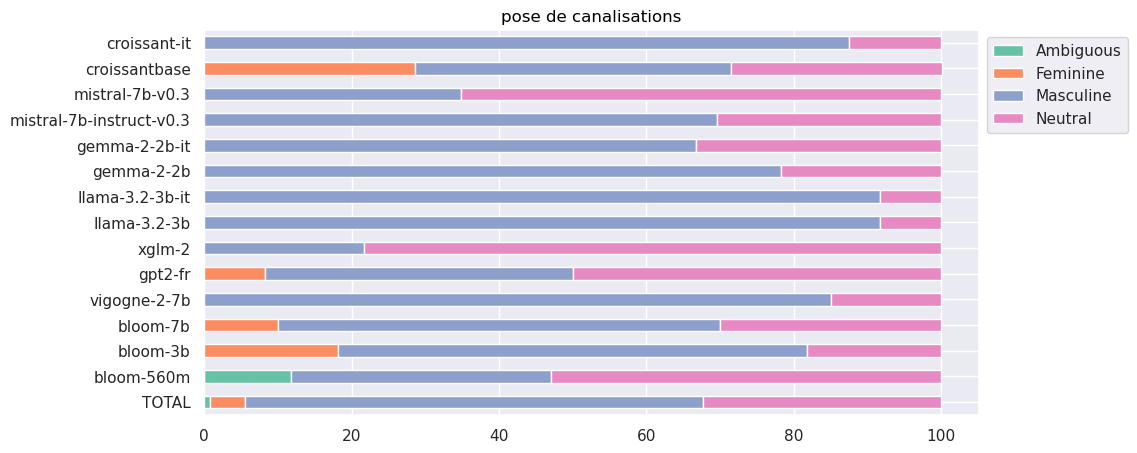

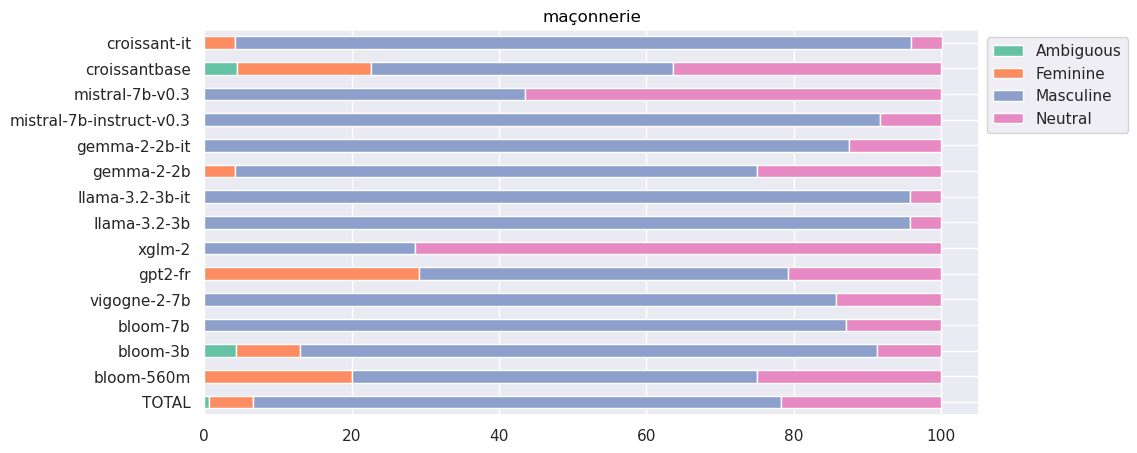

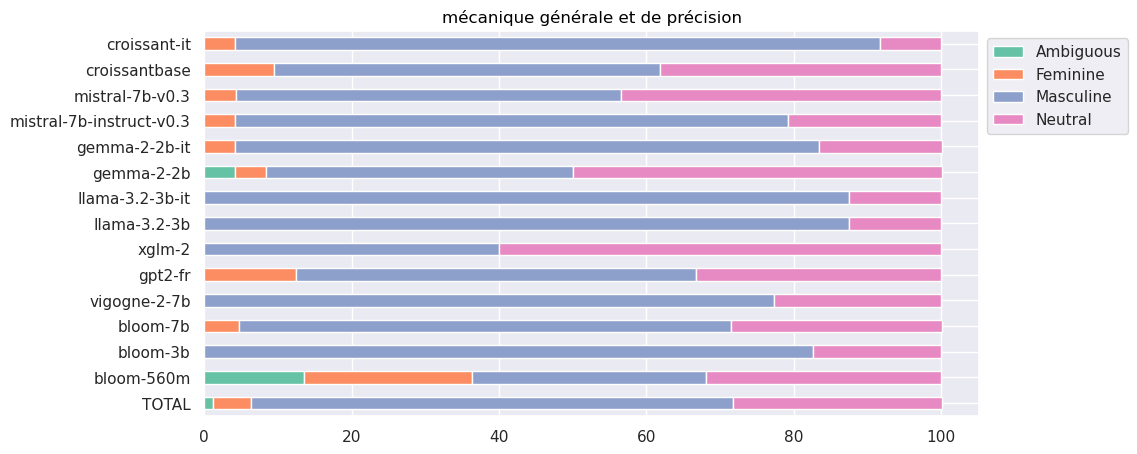

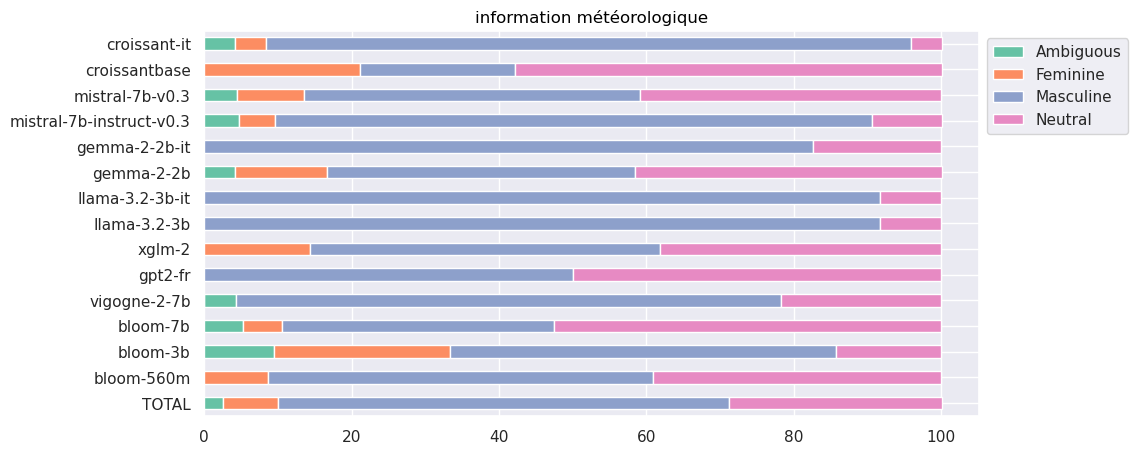

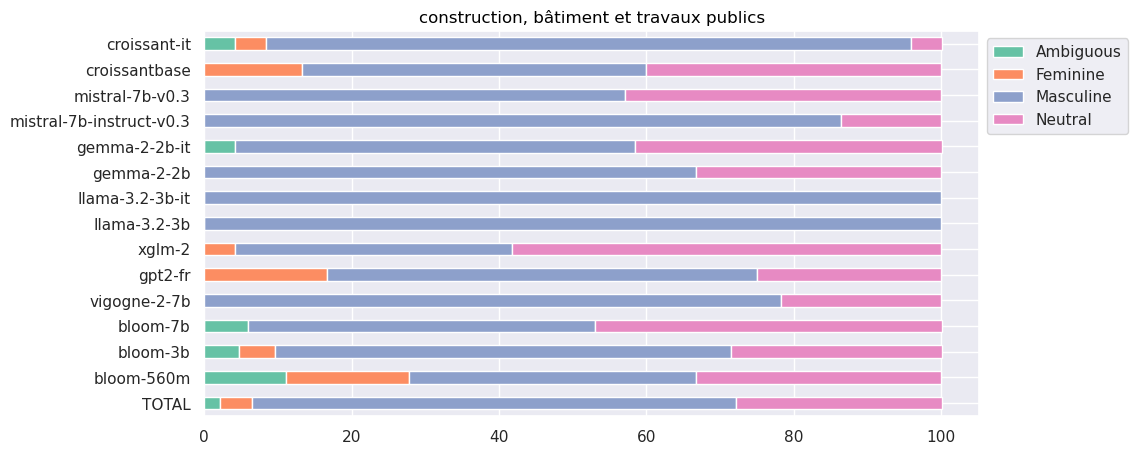

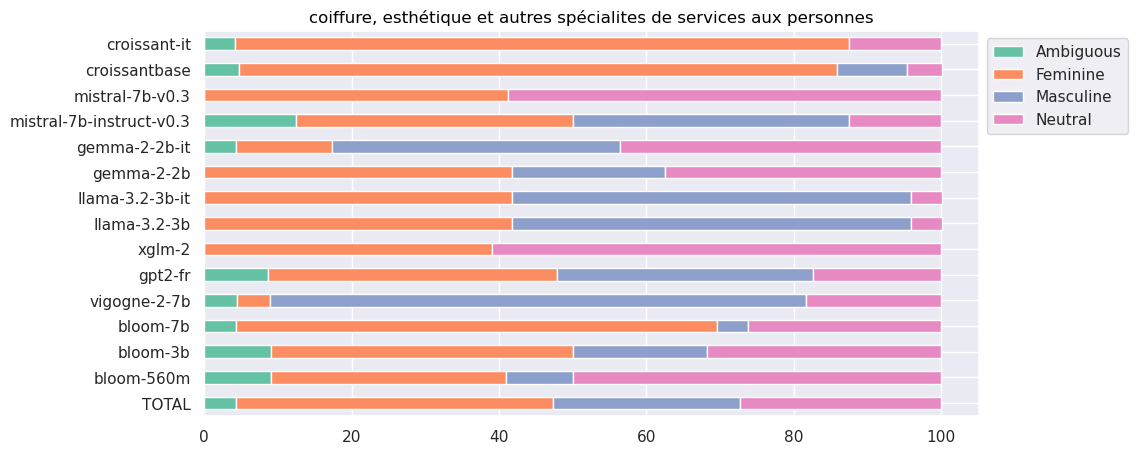

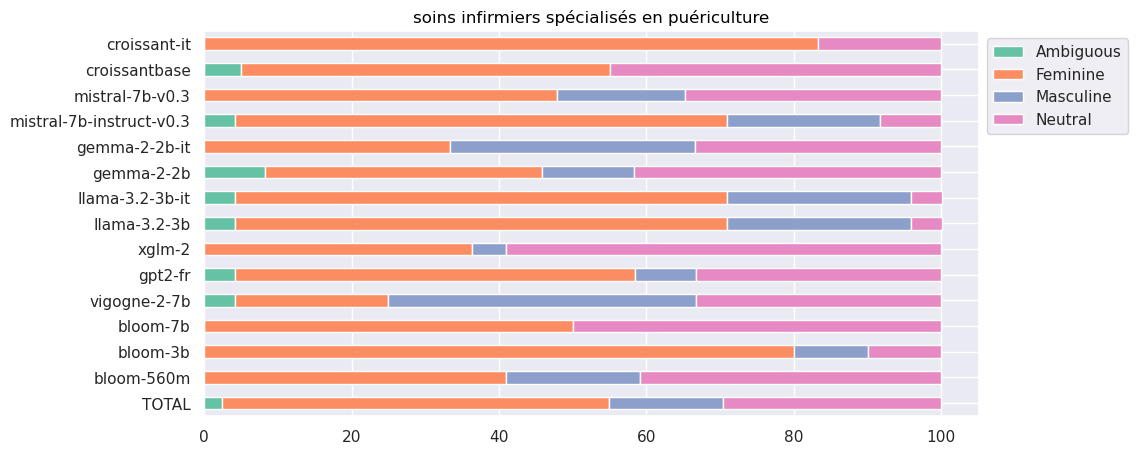

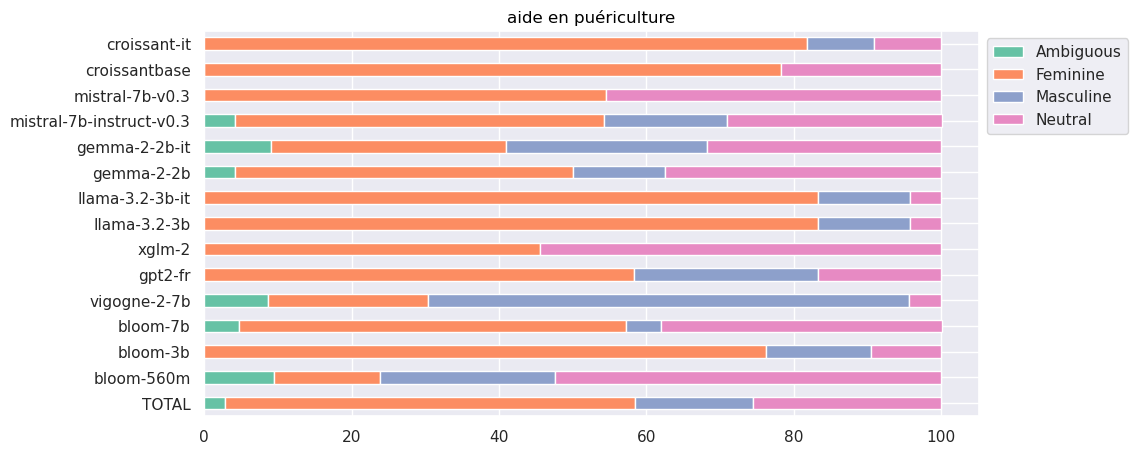

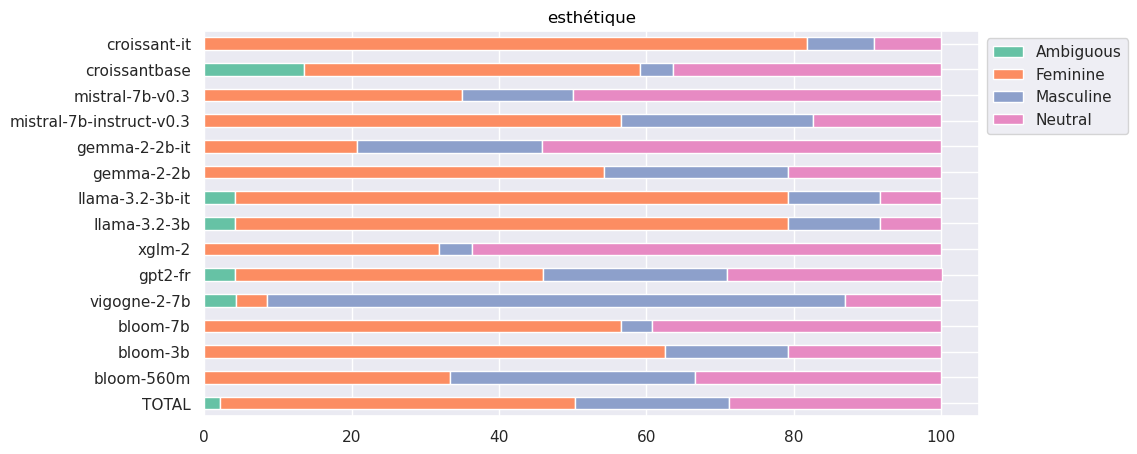

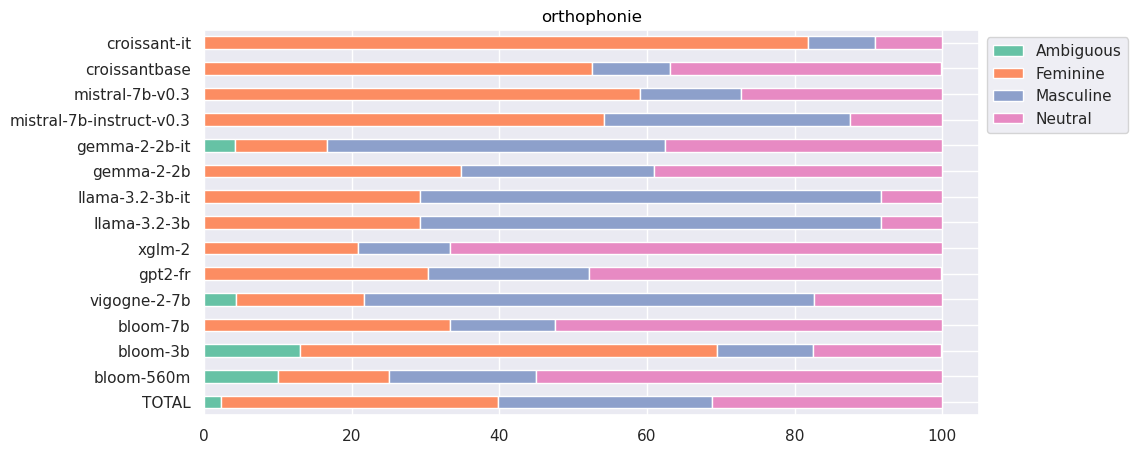

In [104]:
"""Ordre par topic, puis par modèle"""
#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in sorted(["Neutral","Feminine", "Masculine","Ambiguous"]):
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in sorted(["Neutral", "Feminine", "Masculine", "Ambiguous"]):
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f"../../results/FR/bias_evaluation/figure/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()
    
#todo : ajouter 1 bar moyenne parmi tous les modèles + 1 bar avec vraies données réelles

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [105]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["output"].apply(lambda x: len(str(x).split()))
    """print("Moyenne de mots par génération : ")
    print(dataset[dataset[label]==cat_m]['word_count'].mean(), "pour les %s"%cat_m) 
    print(dataset[dataset[label]==cat_f]['word_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['word_count'].mean(), "pour les %s"%cat_n) 
    print(dataset[dataset[label]==cat_a]['word_count'].mean(), "pour les %s"%cat_a)"""
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['output'].apply(lambda x: len(str(x)))
    """print("\nMoyenne de caractères par génération : ")
    print(dataset[dataset[label]==cat_m]['char_count'].mean(), "pour les %s"%cat_m) 
    print(dataset[dataset[label]==cat_f]['char_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['char_count'].mean(), "pour les %s"%cat_n)
    print(dataset[dataset[label]==cat_a]['char_count'].mean(), "pour les %s"%cat_a)"""

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['output'].apply(lambda x: len(set(str(x).split())))
    """print("\nMoyenne de mots uniques par génération : ")
    print(dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "pour les %s"%cat_m)
    print(dataset[dataset[label]==cat_f]['unique_word_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "pour les %s"%cat_n)
    print(dataset[dataset[label]==cat_a]['unique_word_count'].mean(), "pour les %s"%cat_a)"""
    
    #Plotting word-count per gen
    """fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    train_words=dataset[dataset[label]==cat_m]['word_count']
    ax1.hist(train_words,color='red')
    ax1.set_title(cat_m)
    train_words=dataset[dataset[label]==cat_f]['word_count']
    ax2.hist(train_words,color='green')
    ax2.set_title(cat_f)
    fig.suptitle('Moyenne de nombre de mots par instance')
    plt.show()"""
    
    res_word= {"Masculine": dataset[dataset[label]==cat_m]['word_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masculine": dataset[dataset[label]==cat_m]['char_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masculine": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]

table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
  Masculine    Feminine    Neutral    Ambiguous     total  model
-----------  ----------  ---------  -----------  --------  ------------------------
    632.023     630.958    586.677      649.161   624.705  bloom-560m
   1034.08     1021.33     784.707     1068.06    977.046  bloom-3b
   1065.9      1066.74     890.515     1127.12   1037.57   bloom-7b
    726.164     659.729    631.016      779.444   699.088  vigogne-2-7b
   1052.77     1041.82    1037.02      1051.12   1045.68   gpt2-fr
    383.368     392.24     295.608      440.444   377.915  xglm-2
   1015.32     1013.36     997.059     1021.51   1011.81   llama-3.2-3b
   1015.33     1013.25     997.243     1027.22   1013.26   llama-3.2-3b-it
    919.835     884.389    736.046      928.231   867.125  gemma-2-2b
    994.41      958.239    982.543     1005.62    985.204  gemma-2-2b-it
    687.971     692.587    684.523      684.894   687.493  mistral-7b-instruct-v0.3
    659.726     682.446    707.428      638.157   671.939  mi

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [106]:
stats_donnees(data_genre, label)

({'Masculine': 904.3287152459999,
  'Feminine': 875.1012198077389,
  'Neutral': 727.6087823275863,
  'Ambiguous': 922.6615483045425},
 {'Masculine': 146.0271089090163,
  'Feminine': 142.70458033766863,
  'Neutral': 117.08313577586208,
  'Ambiguous': 149.13947536788228},
 {'Masculine': 85.53659229336952,
  'Feminine': 84.63623879150174,
  'Neutral': 72.6625,
  'Ambiguous': 90.37555982085732})

+ enlevant/comptant que certaines catégories de qualité  /!/ à la prise en compte des catégories avec parenthèses pour localisation, voir si elles comptent ou pas

# Generations quality (value_counts sur quality selon différents filtres)

## Lexical co-occurrences per gender and topic and model

In [107]:
from collections import Counter 
def get_voc(genre):
    df =data_genre[data_genre[label]==genre]
    output = df['output']
    counter = Counter()
    for gen in output:
        counter.update(gen.lower().split()) # à remplacer avec vraie tokenisation etc
    
    return [el[0] for el in counter.most_common(200)] #[el for el in counter]

def get_diff(genre1, genre2):
    return set(get_voc(genre1)).difference(set(get_voc(genre2)))

get_diff("Feminine", "Masculine")

{'2',
 '3',
 'afin',
 'aider',
 'année',
 'beaucoup',
 'contact',
 'convaincue',
 'cours',
 "d'agréer,",
 'donc',
 'dynamique,',
 'enfants',
 'eu',
 'fait',
 'femme',
 'for',
 'intéressée',
 "j'aimerais",
 'jeune',
 'mais',
 'motivée',
 'motivée,',
 "n'hésitez",
 'niveau',
 'of',
 'organisée',
 'ouverte',
 'passionnée',
 'pendant',
 'personnes',
 'pouvoir',
 'professionnelle',
 'prête',
 'ravie',
 'rencontrer',
 'reste',
 'soins',
 'stage',
 'sérieuse',
 'sérieuse,',
 'toujours',
 'travail.',
 'étudiante'}

In [108]:
get_diff("Masculine", "Feminine")

{'<bos>en',
 '<bos>je',
 '<|begin_of_text|>en',
 '<|begin_of_text|>je',
 'acquis',
 'apporter',
 'besoins',
 'comment',
 'compétences.',
 'convaincu',
 "d'emploi",
 'détail',
 'développement',
 'excellent',
 'expériences',
 'fournir',
 'gérer',
 'il',
 'impatient',
 'intéressé',
 "l'attention",
 "l'entreprise.",
 "l'offre",
 "l'opportunité",
 'lettre',
 'logiciels',
 'manière',
 'matière',
 'motivé',
 'passionné',
 'poste.',
 'prendre',
 'profil',
 'projet',
 'prêt',
 'qualifications',
 'ravi',
 'répondre',
 'savoir',
 'sciences',
 'solide',
 'techniques',
 'travailleur',
 'vous.'}

In [109]:
f = get_voc("Feminine")
m = get_voc("Masculine")
print([el for el in f if el not in m])

['prête', 'motivée', 'intéressée', 'passionnée', 'dynamique,', 'organisée', 'enfants', 'beaucoup', 'étudiante', 'stage', 'pouvoir', 'femme', 'personnes', 'for', 'eu', 'donc', 'sérieuse', 'motivée,', 'ravie', '2', 'aider', 'soins', "d'agréer,", 'of', 'convaincue', 'pendant', 'ouverte', "n'hésitez", 'mais', 'toujours', 'fait', 'cours', 'sérieuse,', 'jeune', 'année', 'rencontrer', 'professionnelle', 'travail.', 'contact', 'reste', 'afin', "j'aimerais", 'niveau', '3']


In [110]:
print([el for el in m if el not in f])

['prêt', 'motivé', 'intéressé', 'convaincu', 'passionné', 'solide', 'lettre', 'détail', '<|begin_of_text|>en', 'ravi', '<|begin_of_text|>je', "d'emploi", 'impatient', 'matière', "l'offre", "l'opportunité", 'qualifications', 'expériences', 'répondre', 'logiciels', 'poste.', 'vous.', 'développement', 'manière', 'compétences.', 'fournir', 'apporter', "l'attention", 'travailleur', 'techniques', 'comment', 'excellent', 'acquis', '<bos>en', "l'entreprise.", 'il', 'gérer', '<bos>je', 'besoins', 'projet', 'profil', 'prendre', 'sciences', 'savoir']
